In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from matplotlib.lines import Line2D
from matplotlib.legend_handler import HandlerTuple
import matplotlib
import os


In [2]:
plt.rcParams.update({
    # Fonts - Times, 8-12 pt
    "font.family": "serif",
    "font.serif": ["Times New Roman", "Times"],
    "font.size": 12,                  # Base size 8-12 pt

    # Axes
    "axes.titlesize": 12,             # Axis title size
    "axes.labelsize": 12,             # Axis label size
    "axes.labelweight": "normal",     # Normal weight
    "axes.titleweight": "normal",     # Normal weight for titles

    # Ticks
    "xtick.labelsize": 9,             # X tick label size (8-12)
    "ytick.labelsize": 9,             # Y tick label size (8-12)
    "xtick.direction": "in",          # Tick direction
    "ytick.direction": "in",          # Tick direction

    # Legends
    "legend.fontsize": 12,            # Legend text size (8-12)
    "legend.title_fontsize": 12,      # Legend title size (8-12)
    "legend.loc": 'best',             # Automatic location

    # Resolution
    "figure.dpi": 500,                # Display DPI
    "savefig.dpi": 500,               # Save DPI (300-600)
    "savefig.bbox": "tight",          # Crop whitespace

    # Without LaTeX
    "text.usetex": False,             # PLOS does not accept LaTeX EPS
    "mathtext.fontset": "dejavuserif",# Match math fonts to serif
})

Now that all the data are saved in separate folders, we can start exploring the results. Let’s take simulation 1 (for a given Vr=-8.5) and plot the outcome of the training.

Lets analyse networks with `pqif = 0, 0.5, 1`

In [3]:
names = ['LIF', 'MIX', 'QIF']
colors = ['firebrick', 'forestgreen', 'steelblue']
pqif_values = [0, 0.5, 1]
idx = 1 #simulation_{idx}

N = 200
idx = 4
itmax = 2000
itstim = 200 
nloop = 16

v_rest = [-22, -17, -12.3, -8.5]
cmap = plt.cm.Reds
vrest_sorted = sorted(v_rest)
colors_sorted = [cmap(x) for x in np.linspace(0.25, 1, len(v_rest))]
color_map = {vr: c for vr, c in zip(vrest_sorted, colors_sorted)}



We trained the neural inputs, now let’s see how they evolve across the different training/testing loops.
Next, we plot the target (in red) and the neural inputs for two neurons (5 and 7), which have different romega values (5 and 1, respectively) for pqif=0 

As we can see on the previous figures, the neural input is really similar to the target.

We can quantify the similarity between the Pearson Correlation coefficent (it goes between -1 and 1, -1 indicates that the target and the input are anticorrelated, 0 that are not correlated at all adn 1 that are completely correlated)


Calculando correlaciones para todas las semillas...
Configuración: idx=1, 10 semillas

Procesando pqif=0...
  ✓ pqif=0 completado
Procesando pqif=0.25...
  ✓ pqif=0.25 completado
Procesando pqif=0.5...
  ✓ pqif=0.5 completado
Procesando pqif=0.75...
  ✓ pqif=0.75 completado
Procesando pqif=1...
  ✓ pqif=1 completado

¡Cálculos completados!


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


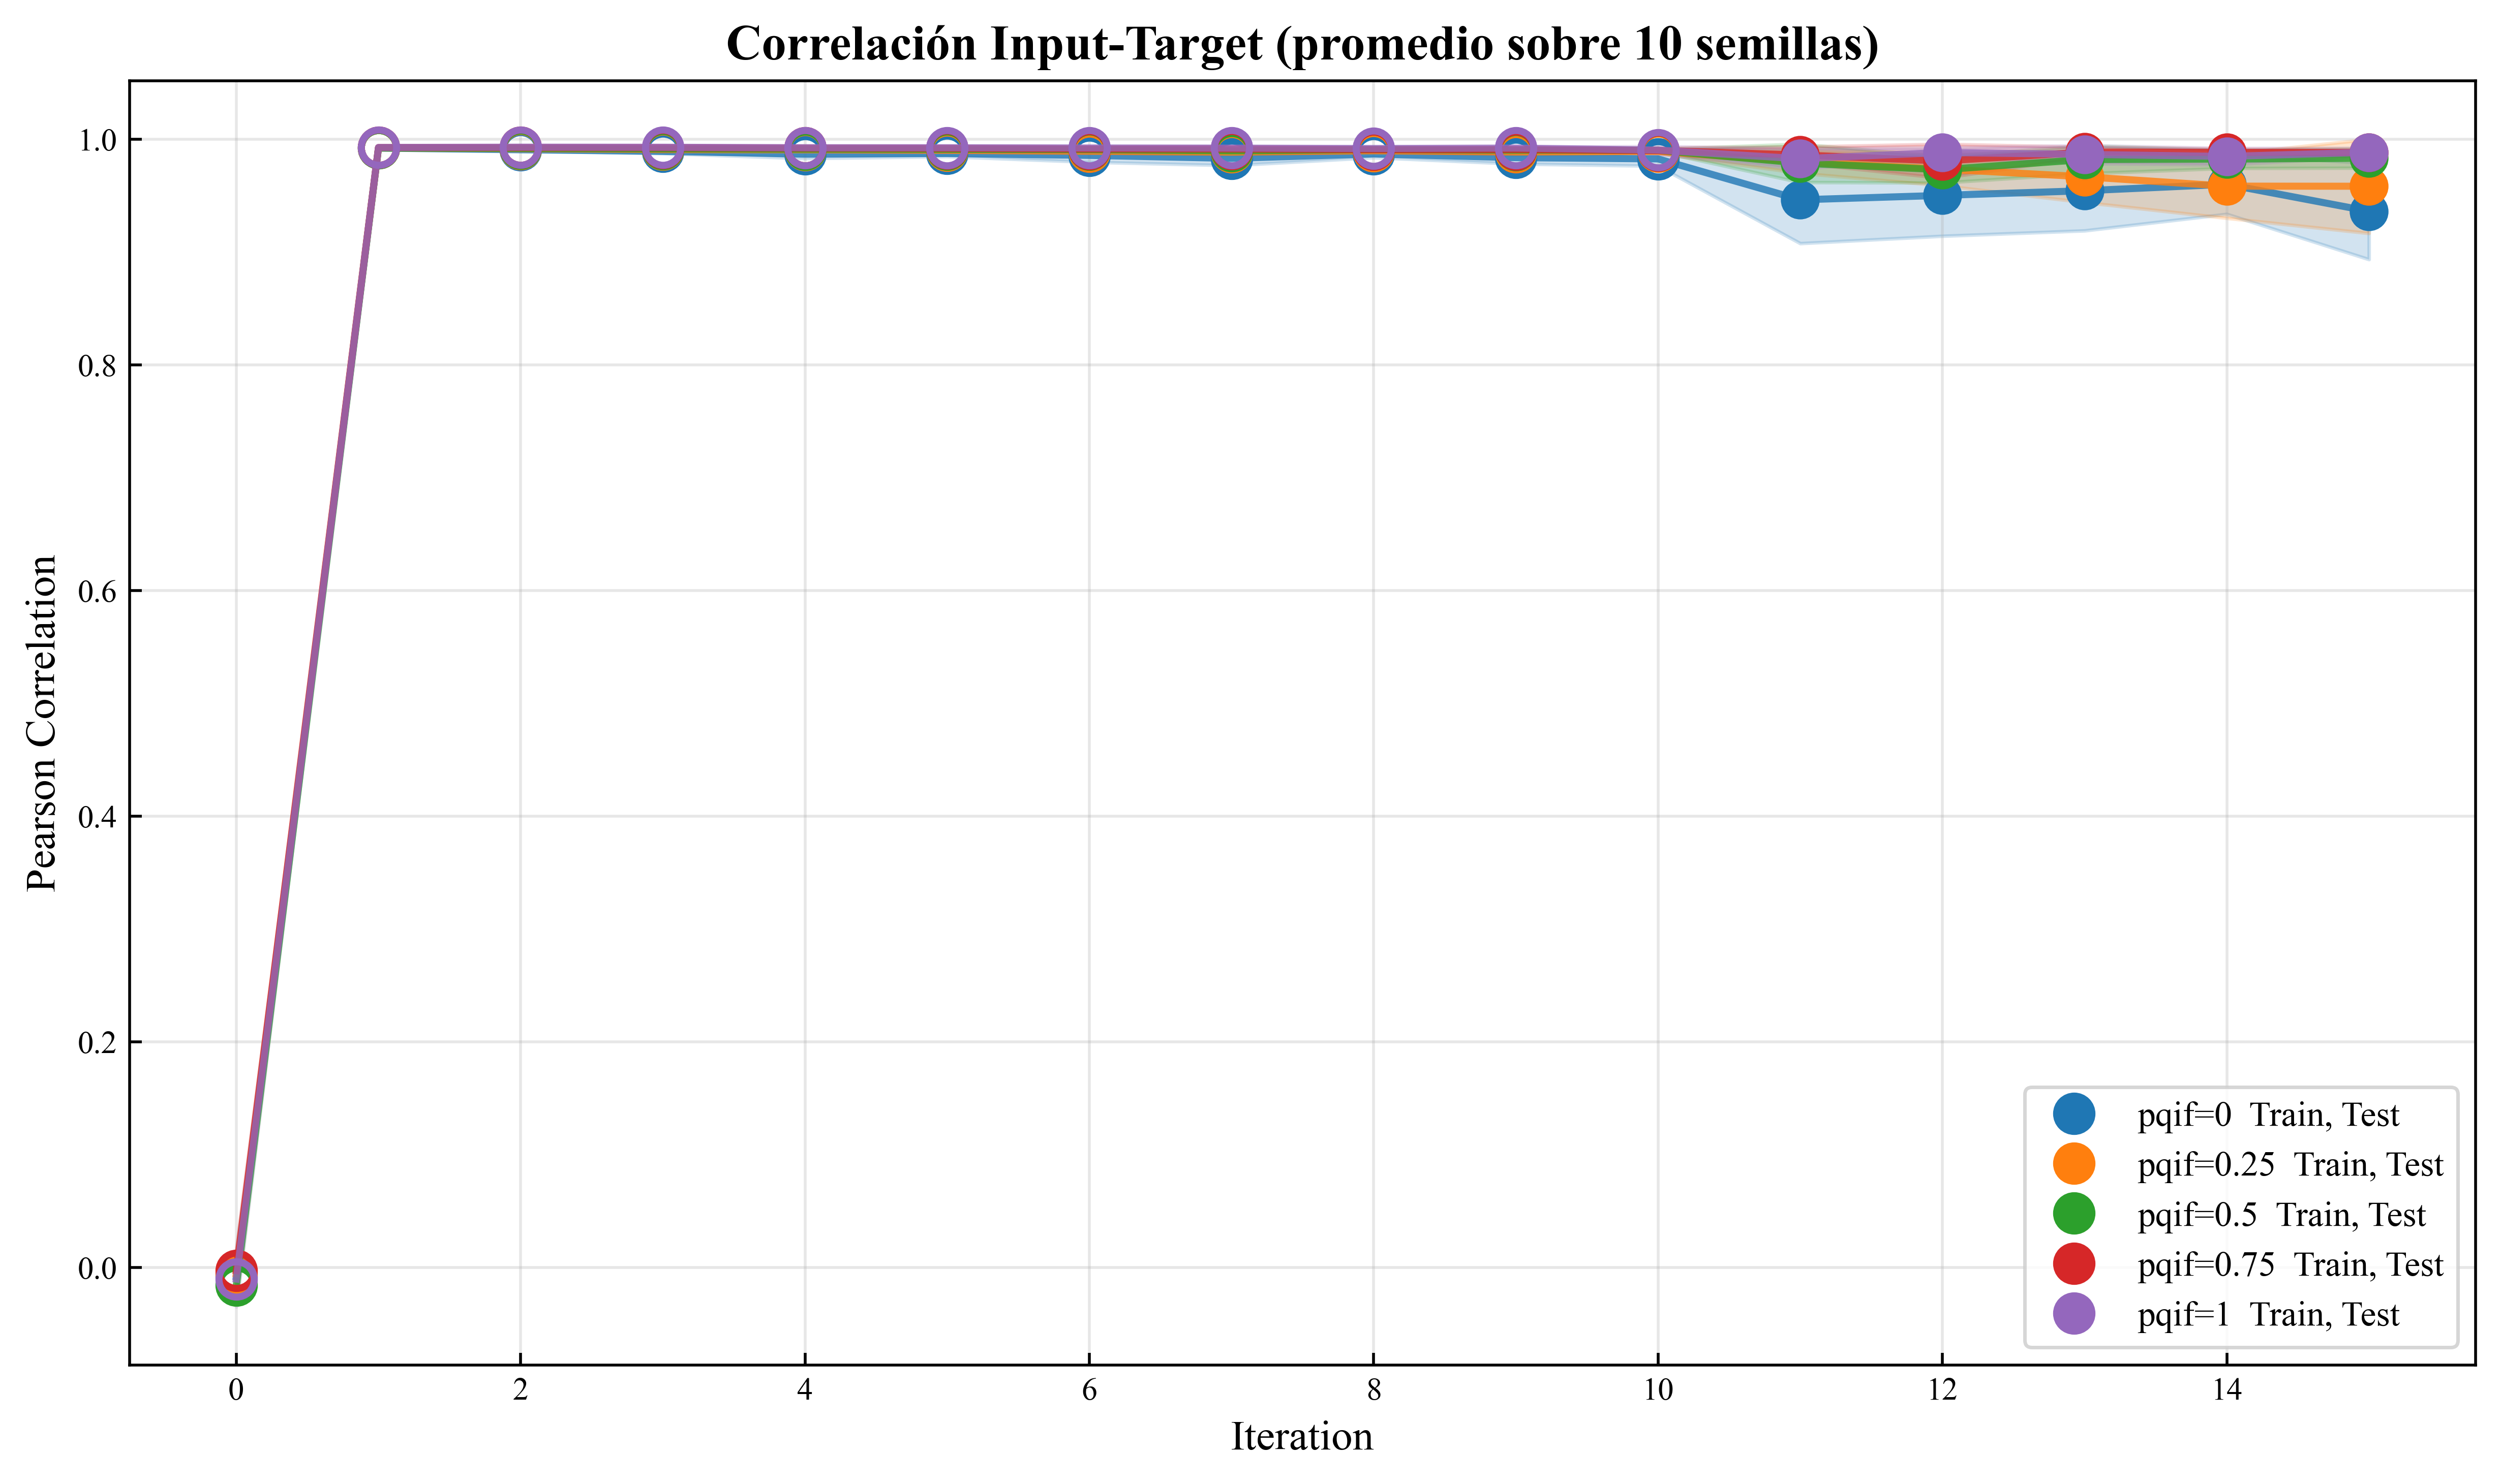


✓ Figuras guardadas como:
  - CC_oscillations_idx1_10seeds.eps
  - CC_oscillations_idx1_10seeds.png

ESTADÍSTICAS FINALES

pqif=0:
  Correlación inicial (loop 0): -0.0081 ± 0.0185
  Correlación final train (loop 10): 0.9824 ± 0.0063
  Correlación final test (loop 15): 0.9360 ± 0.0427
  Mejora train: 0.9905
  Diferencia train-test: 0.0464

pqif=0.25:
  Correlación inicial (loop 0): -0.0057 ± 0.0117
  Correlación final train (loop 10): 0.9891 ± 0.0020
  Correlación final test (loop 15): 0.9582 ± 0.0416
  Mejora train: 0.9948
  Diferencia train-test: 0.0310

pqif=0.5:
  Correlación inicial (loop 0): -0.0159 ± 0.0169
  Correlación final train (loop 10): 0.9900 ± 0.0010
  Correlación final test (loop 15): 0.9830 ± 0.0085
  Mejora train: 1.0060
  Diferencia train-test: 0.0071

pqif=0.75:
  Correlación inicial (loop 0): -0.0028 ± 0.0203
  Correlación final train (loop 10): 0.9898 ± 0.0025
  Correlación final test (loop 15): 0.9880 ± 0.0029
  Mejora train: 0.9926
  Diferencia train-test: 0.00

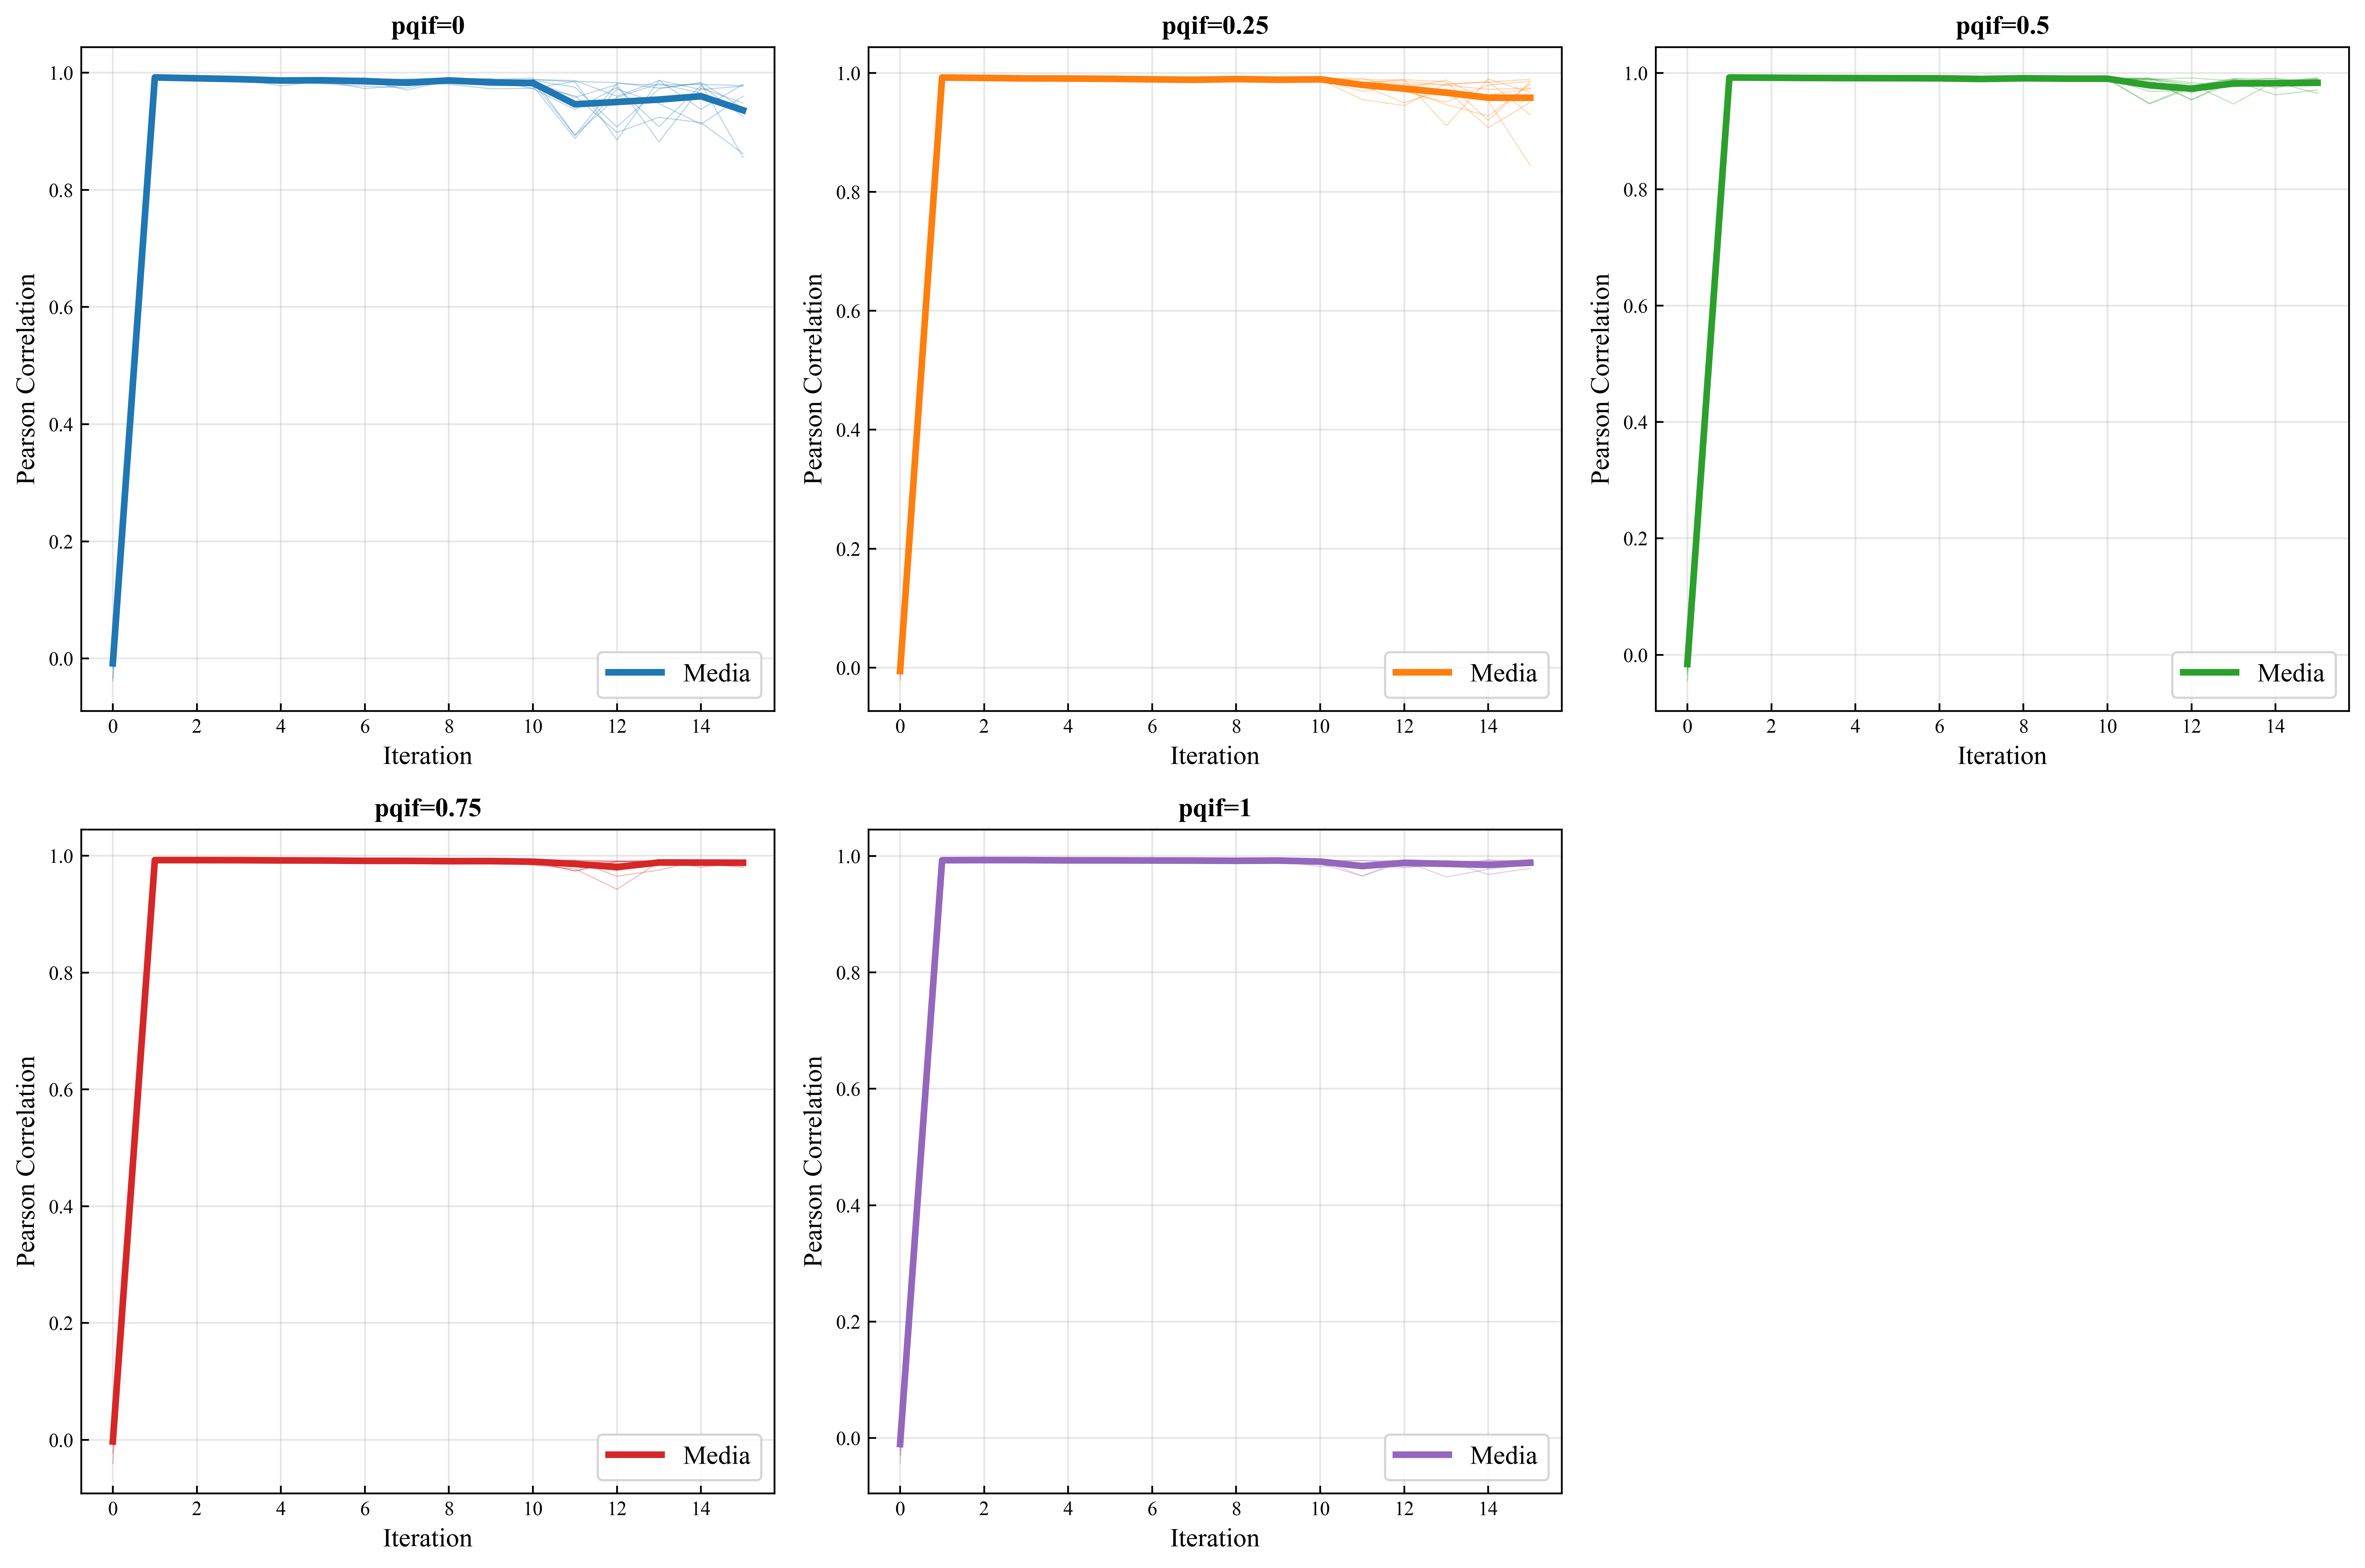

✓ Plot de semillas individuales guardado

¡ANÁLISIS COMPLETADO!


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import pandas as pd
from matplotlib.lines import Line2D
from matplotlib.legend_handler import HandlerTuple

# ========== PARÁMETROS ==========
idx = 1
N = 200
nloop = 16
itstim = 200
cant_seed = 10  # Número de semillas

# Valores de pqif
pqif_values = [0, 0.25, 0.5, 0.75, 1]

# Colores y nombres para cada pqif
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
names = ['pqif=0', 'pqif=0.25', 'pqif=0.5', 'pqif=0.75', 'pqif=1']

# ========== FUNCIÓN PARA CALCULAR CORRELACIÓN DE UNA SEMILLA ==========
def calcular_correlacion_seed(idx, pqif, seed, nloop, itstim, N):
    """
    Calcula la correlación para una semilla específica
    """
    cc_seed = np.zeros(nloop)
    
    # Cargar targets (solo una vez por pqif, no depende de seed)
    target_csv = pd.read_csv(f'simulation_{idx}/simulation_{idx}_targets_{pqif}.csv')
    targets = target_csv.values
    
    for iloop in range(nloop):
        file = f'simulation_{idx}/simulation_{idx}_inputs/simulation_{idx}_inputs_pqif_{pqif}_iloop_{iloop}_seed_{seed}.csv'
        
        try:
            df = pd.read_csv(file, header=None).values
            ci = np.zeros(N)
            
            for i in range(N):
                rout_i = df[:, i]
                if np.var(targets[itstim:, i]) > 0 and np.var(rout_i[itstim:]) > 0:
                    ci[i] = pearsonr(targets[itstim:, i], rout_i[itstim:])[0]
            
            cc_seed[iloop] = np.mean(ci)
        except FileNotFoundError:
            print(f"Advertencia: No se encontró el archivo para seed={seed}, iloop={iloop}")
            cc_seed[iloop] = np.nan
    
    return cc_seed


# ========== CALCULAR CORRELACIONES PARA TODAS LAS SEMILLAS ==========
omegagauss = 0.5  # Puedes cambiar este valor

print("Calculando correlaciones para todas las semillas...")
print(f"Configuración: idx={idx}, {cant_seed} semillas\n")

# Diccionario para almacenar resultados
resultados = {}

for pqif in pqif_values:
    print(f"Procesando pqif={pqif}...")
    
    # Array para almacenar correlaciones de todas las semillas
    cc_all_seeds = np.zeros((cant_seed, nloop))
    
    for seed in range(cant_seed):
        cc_all_seeds[seed, :] = calcular_correlacion_seed(idx, pqif, seed, nloop, itstim, N)
    
    # Calcular media y desviación estándar sobre las semillas
    cc_mean = np.nanmean(cc_all_seeds, axis=0)
    cc_std = np.nanstd(cc_all_seeds, axis=0)
    
    resultados[pqif] = {
        'mean': cc_mean,
        'std': cc_std,
        'all_seeds': cc_all_seeds
    }
    
    print(f"  ✓ pqif={pqif} completado")

print("\n¡Cálculos completados!")

# ========== CREAR FIGURA ==========
fig, ax = plt.subplots(figsize=(10, 6))

for pqif, color, nombre in zip(pqif_values, colors, names):
    cc_mean = resultados[pqif]['mean']
    cc_std = resultados[pqif]['std']
    
    # Plot curva principal (media)
    ax.plot(np.arange(nloop), cc_mean, color=color, linewidth=2, alpha=0.8, label=nombre)
    
    # Plot banda de error (desviación estándar)
    ax.fill_between(np.arange(nloop), 
                     cc_mean - cc_std, 
                     cc_mean + cc_std, 
                     color=color, alpha=0.2)
    
    # Marcadores para training (loops 1-10)
    ax.plot(np.arange(1, 11), cc_mean[1:11], 'o', markersize=10, 
            color=color, markerfacecolor='none', markeredgewidth=2)
    
    # Marcadores para test (loops 11-15)
    ax.plot(np.arange(11, 16), cc_mean[11:], 'o', markersize=10, 
            color=color, markerfacecolor=color)
    
    # Marcador inicial (loop 0)
    ax.plot(0, cc_mean[0], 'o', color=color, markersize=10, 
            markerfacecolor='none', markeredgewidth=2)

# Labels y título
ax.set_title(f'Correlación Input-Target (promedio sobre {cant_seed} semillas)', fontsize=14, fontweight='bold')
ax.set_xlabel('Iteration', fontsize=12)
ax.set_ylabel('Pearson Correlation', fontsize=12)
ax.grid(True, alpha=0.3)

# Leyenda personalizada
legend_elements = []
labels = []
for color, nombre in zip(colors, names):
    train_marker = Line2D([0], [0], marker='o', color=color, markerfacecolor='none',
                          markersize=10, linestyle='None', markeredgewidth=2)
    test_marker = Line2D([0], [0], marker='o', color=color, markerfacecolor=color,
                         markersize=10, linestyle='None')
    legend_elements.append((train_marker, test_marker))
    labels.append(f"{nombre}  Train, Test")

ax.legend(legend_elements, labels, handler_map={tuple: HandlerTuple()}, 
         loc='lower right', fontsize=10)

plt.tight_layout()
plt.savefig(f'CC_oscillations_idx{idx}_{cant_seed}seeds.eps', dpi=300)
plt.savefig(f'CC_oscillations_idx{idx}_{cant_seed}seeds.png', dpi=300)
plt.show()

print(f"\n✓ Figuras guardadas como:")
print(f"  - CC_oscillations_idx{idx}_{cant_seed}seeds.eps")
print(f"  - CC_oscillations_idx{idx}_{cant_seed}seeds.png")

# ========== ESTADÍSTICAS ADICIONALES ==========
print("\n" + "="*70)
print("ESTADÍSTICAS FINALES")
print("="*70)

for pqif, nombre in zip(pqif_values, names):
    cc_mean = resultados[pqif]['mean']
    cc_std = resultados[pqif]['std']
    
    print(f"\n{nombre}:")
    print(f"  Correlación inicial (loop 0): {cc_mean[0]:.4f} ± {cc_std[0]:.4f}")
    print(f"  Correlación final train (loop 10): {cc_mean[10]:.4f} ± {cc_std[10]:.4f}")
    print(f"  Correlación final test (loop 15): {cc_mean[15]:.4f} ± {cc_std[15]:.4f}")
    print(f"  Mejora train: {cc_mean[10] - cc_mean[0]:.4f}")
    print(f"  Diferencia train-test: {cc_mean[10] - cc_mean[15]:.4f}")

# ========== OPCIONAL: GUARDAR RESULTADOS EN CSV ==========
print("\n" + "="*70)
print("Guardando resultados en CSV...")

# Crear DataFrame con todos los resultados
data_export = []
for pqif in pqif_values:
    for iloop in range(nloop):
        data_export.append({
            'pqif': pqif,
            'iloop': iloop,
            'cc_mean': resultados[pqif]['mean'][iloop],
            'cc_std': resultados[pqif]['std'][iloop]
        })

df_export = pd.DataFrame(data_export)
filename_csv = f'correlaciones_idx{idx}_{cant_seed}seeds.csv'
df_export.to_csv(filename_csv, index=False)
print(f"✓ Resultados guardados en: {filename_csv}")

# ========== OPCIONAL: PLOT INDIVIDUAL DE CADA SEMILLA ==========
# Descomenta esta sección si quieres ver las trayectorias individuales


fig2, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx_pqif, (pqif, color, nombre) in enumerate(zip(pqif_values, colors, names)):
    ax = axes[idx_pqif]
    
    # Plot todas las semillas individuales
    for seed in range(cant_seed):
        cc_seed = resultados[pqif]['all_seeds'][seed, :]
        ax.plot(np.arange(nloop), cc_seed, color=color, alpha=0.3, linewidth=0.5)
    
    # Plot media
    cc_mean = resultados[pqif]['mean']
    ax.plot(np.arange(nloop), cc_mean, color=color, linewidth=3, label='Media')
    
    ax.set_title(nombre, fontsize=12, fontweight='bold')
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Pearson Correlation')
    ax.grid(True, alpha=0.3)
    ax.legend()

# Ocultar subplot extra
axes[-1].axis('off')

plt.tight_layout()
plt.savefig(f'CC_all_seeds_individual_idx{idx}_omega{omegagauss}.png', dpi=300)
plt.show()
print(f"✓ Plot de semillas individuales guardado")


print("\n" + "="*70)
print("¡ANÁLISIS COMPLETADO!")
print("="*70)

Now we can plot the connectivity distribution after training

We can also see how the weights evolve over time

And the eigenspectrum of the connectivity distribution

In [12]:
# caculo D_PR con bias
def dpr_bias(ccorr, N, nloop):
    a = np.extract(np.identity(N), ccorr)
    c = np.extract(1-np.identity(N), ccorr)
    am2 = np.mean(a)**2
    astd2 = np.var(a)*N/(N-1)
    cm2 = np.mean(c)**2
    cstd2 = np.var(c)*N*(N-1)/(N*(N-1)-2)

    astd_bias2 = astd2*(nloop-1)/(nloop+1) - 2*(am2-cm2) / \
        (nloop-1) + 2*cstd2/(nloop+1)
    cstd_bias2 = (nloop-1)*cstd2/nloop - (am2-cm2)/nloop - \
        4*(cm2-np.sqrt(am2*cm2))/(nloop*(N+1))

    dpr_bias = N/(1+(astd_bias2/am2)+(N-1)*((cstd_bias2/am2)+(cm2/am2)))

    return dpr_bias, am2, cm2, astd2, cstd2

DPR del TARGET = 4.2131


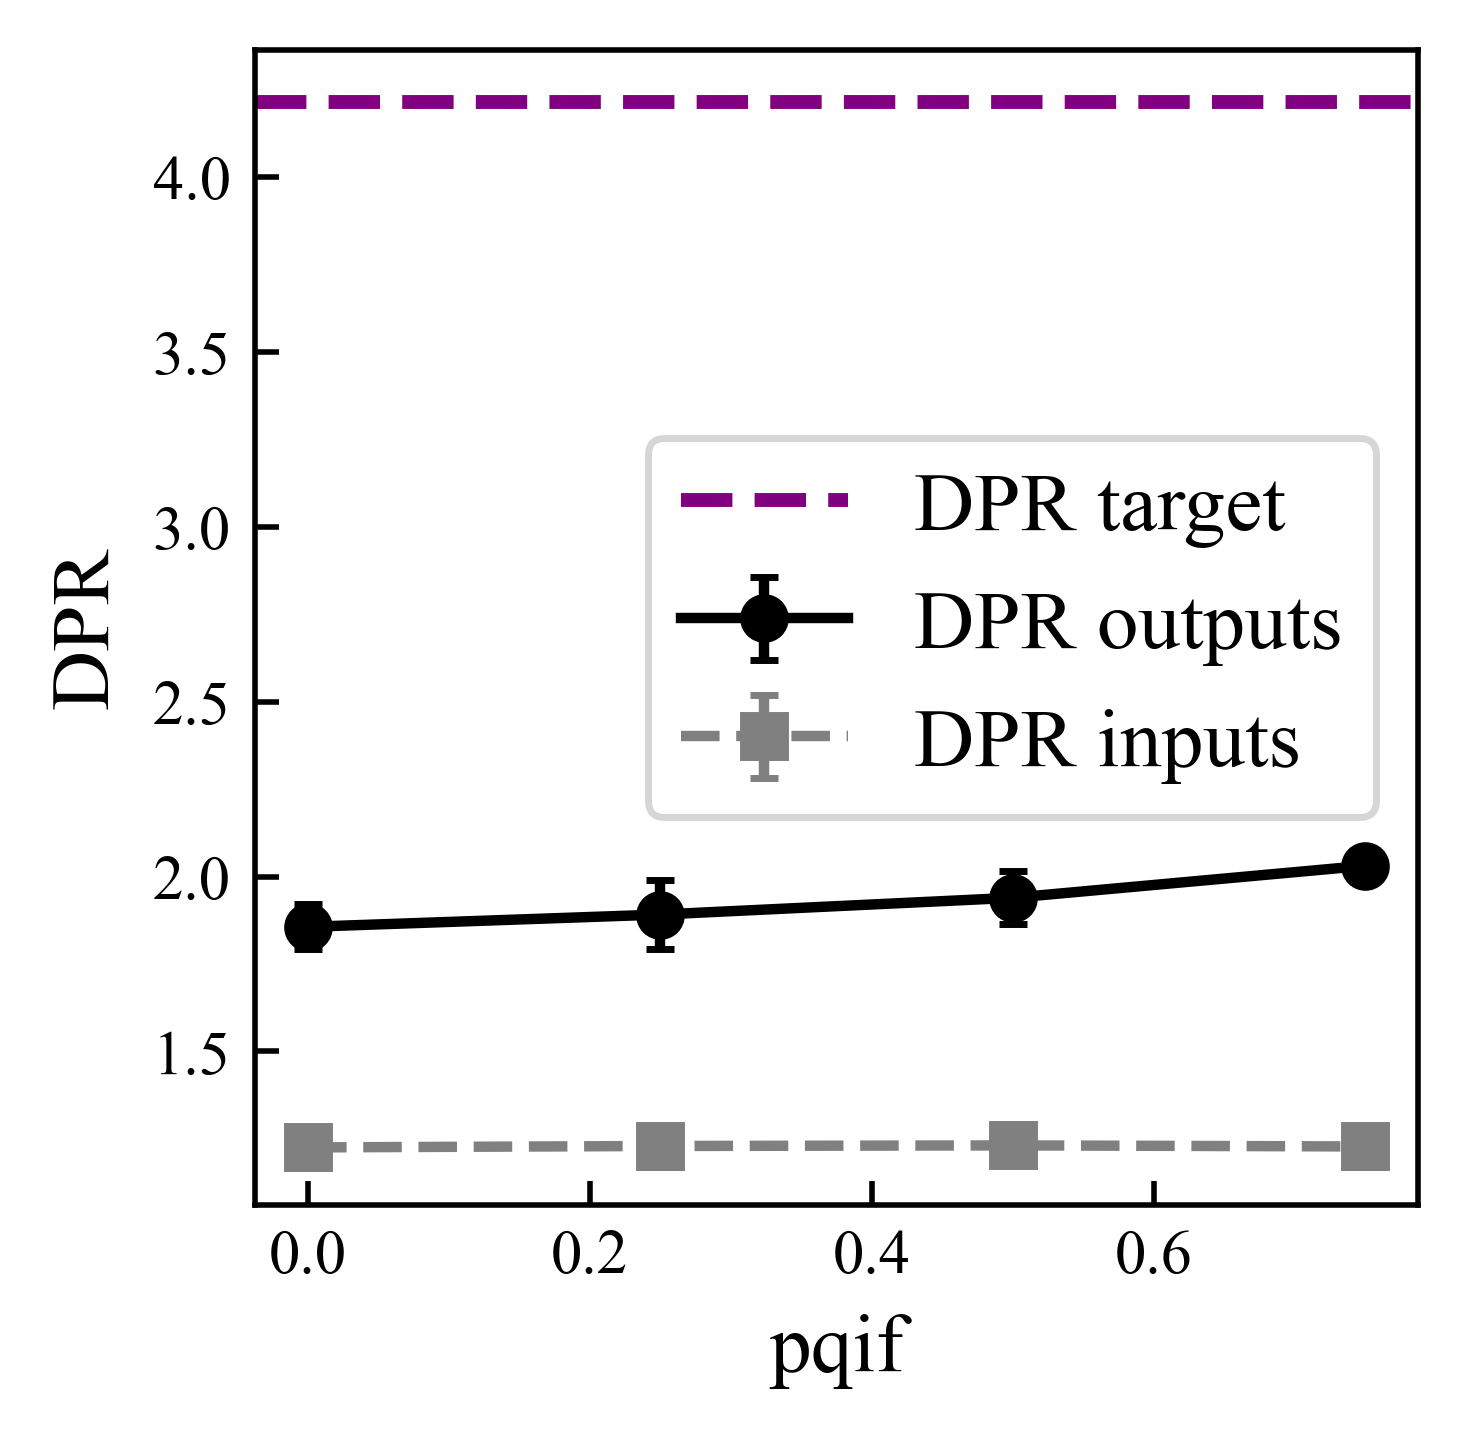

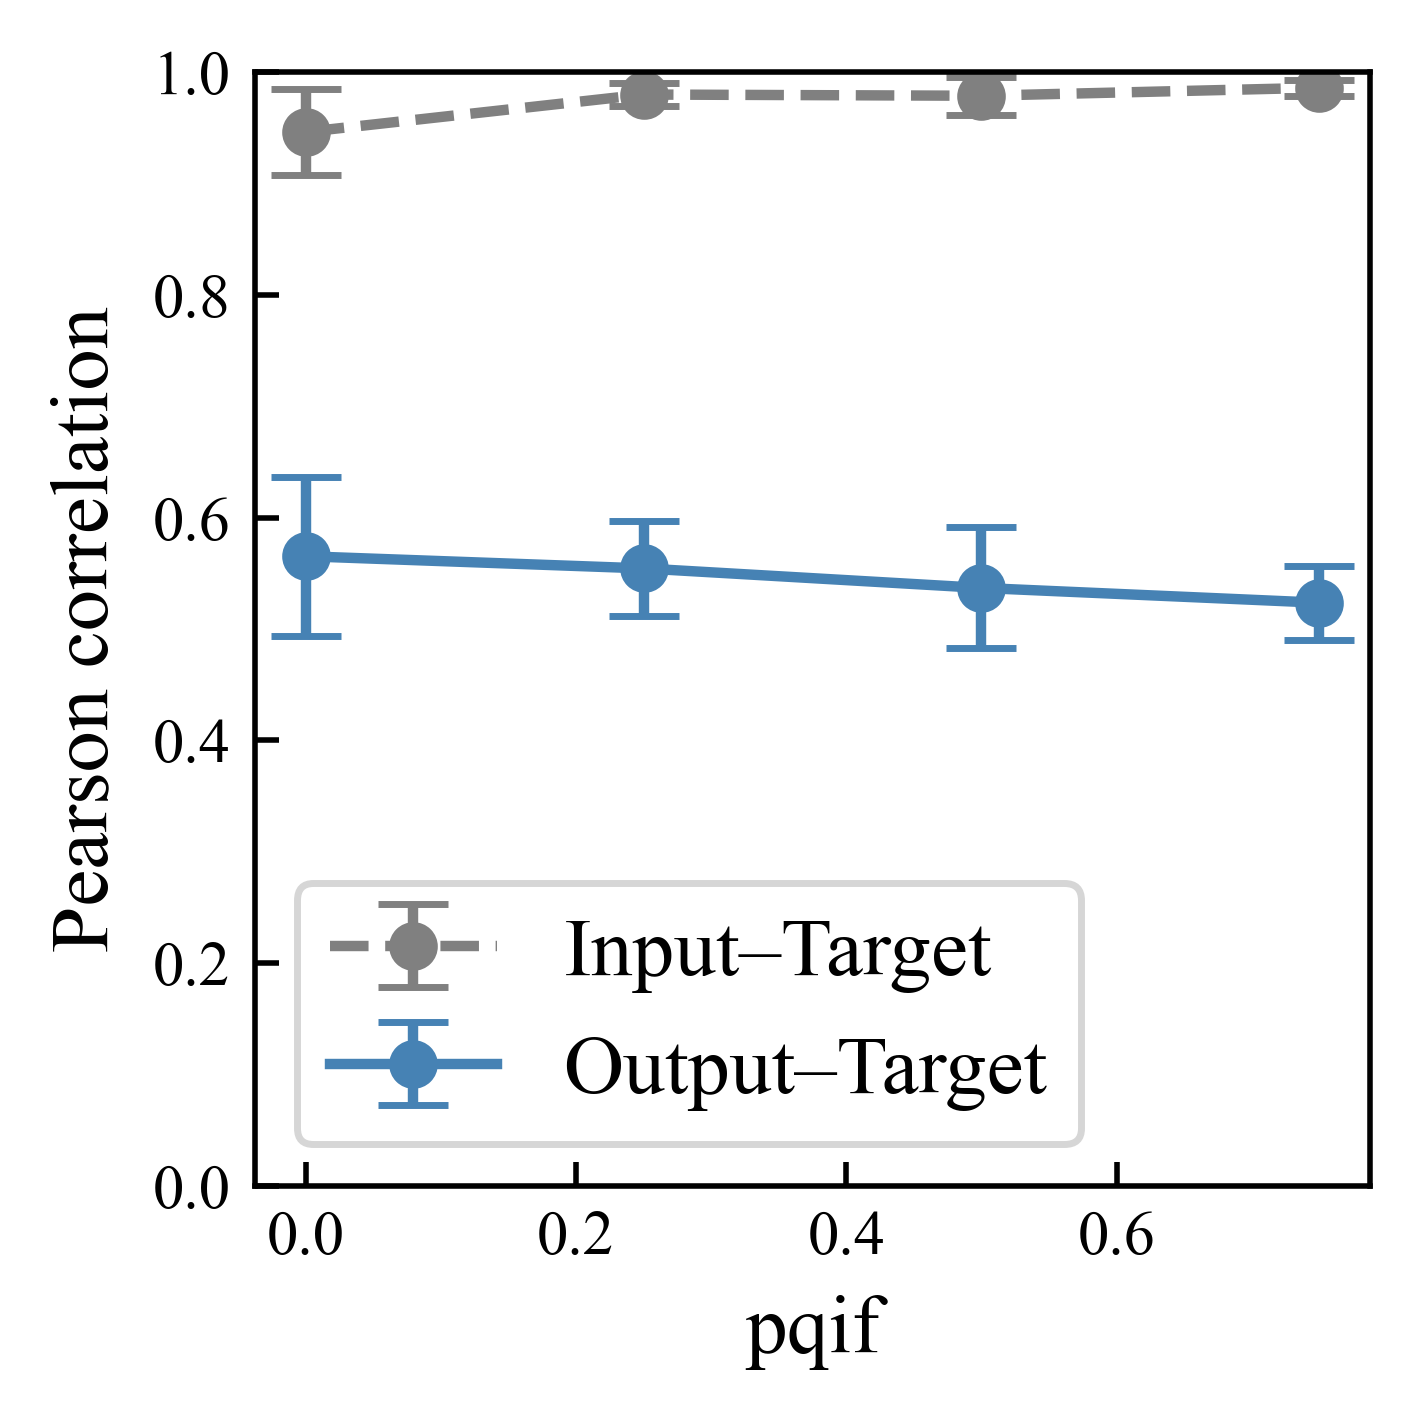

DPR del TARGET = 4.2131


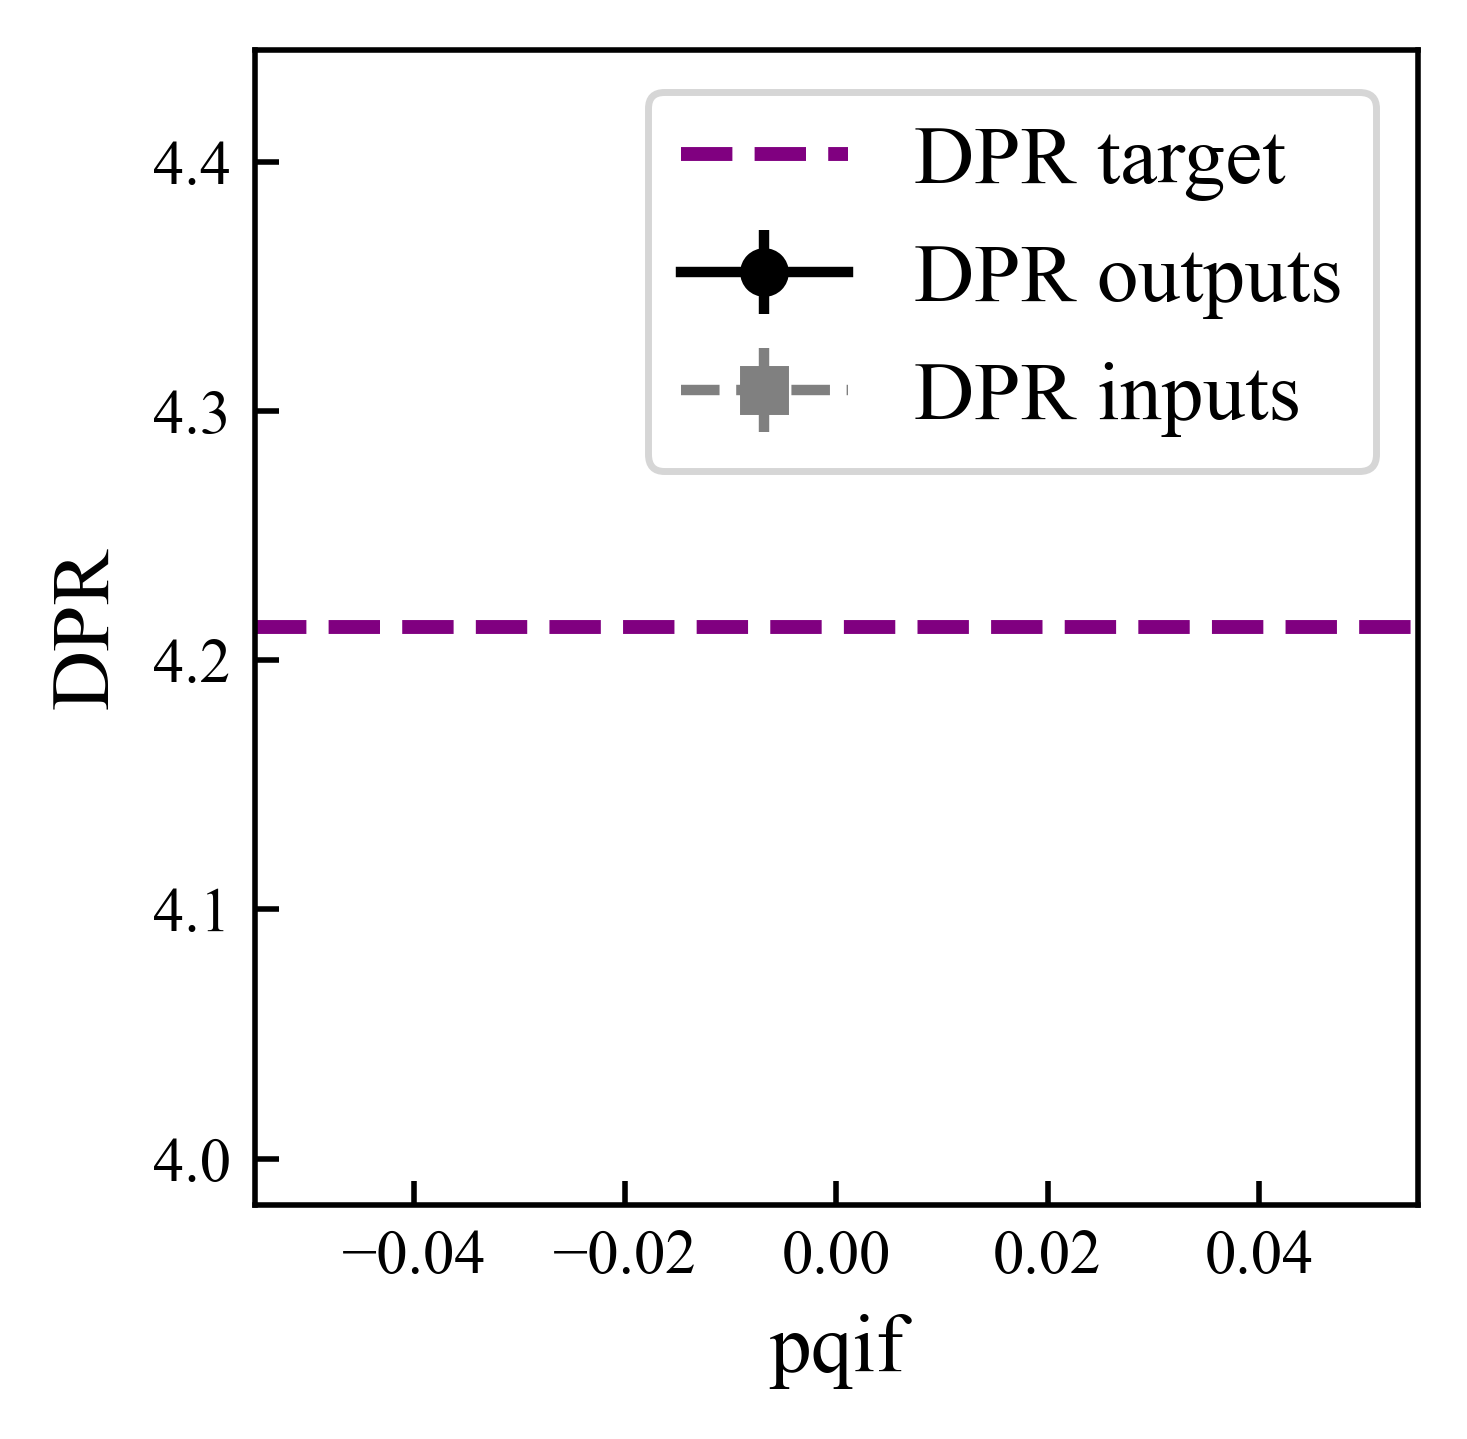

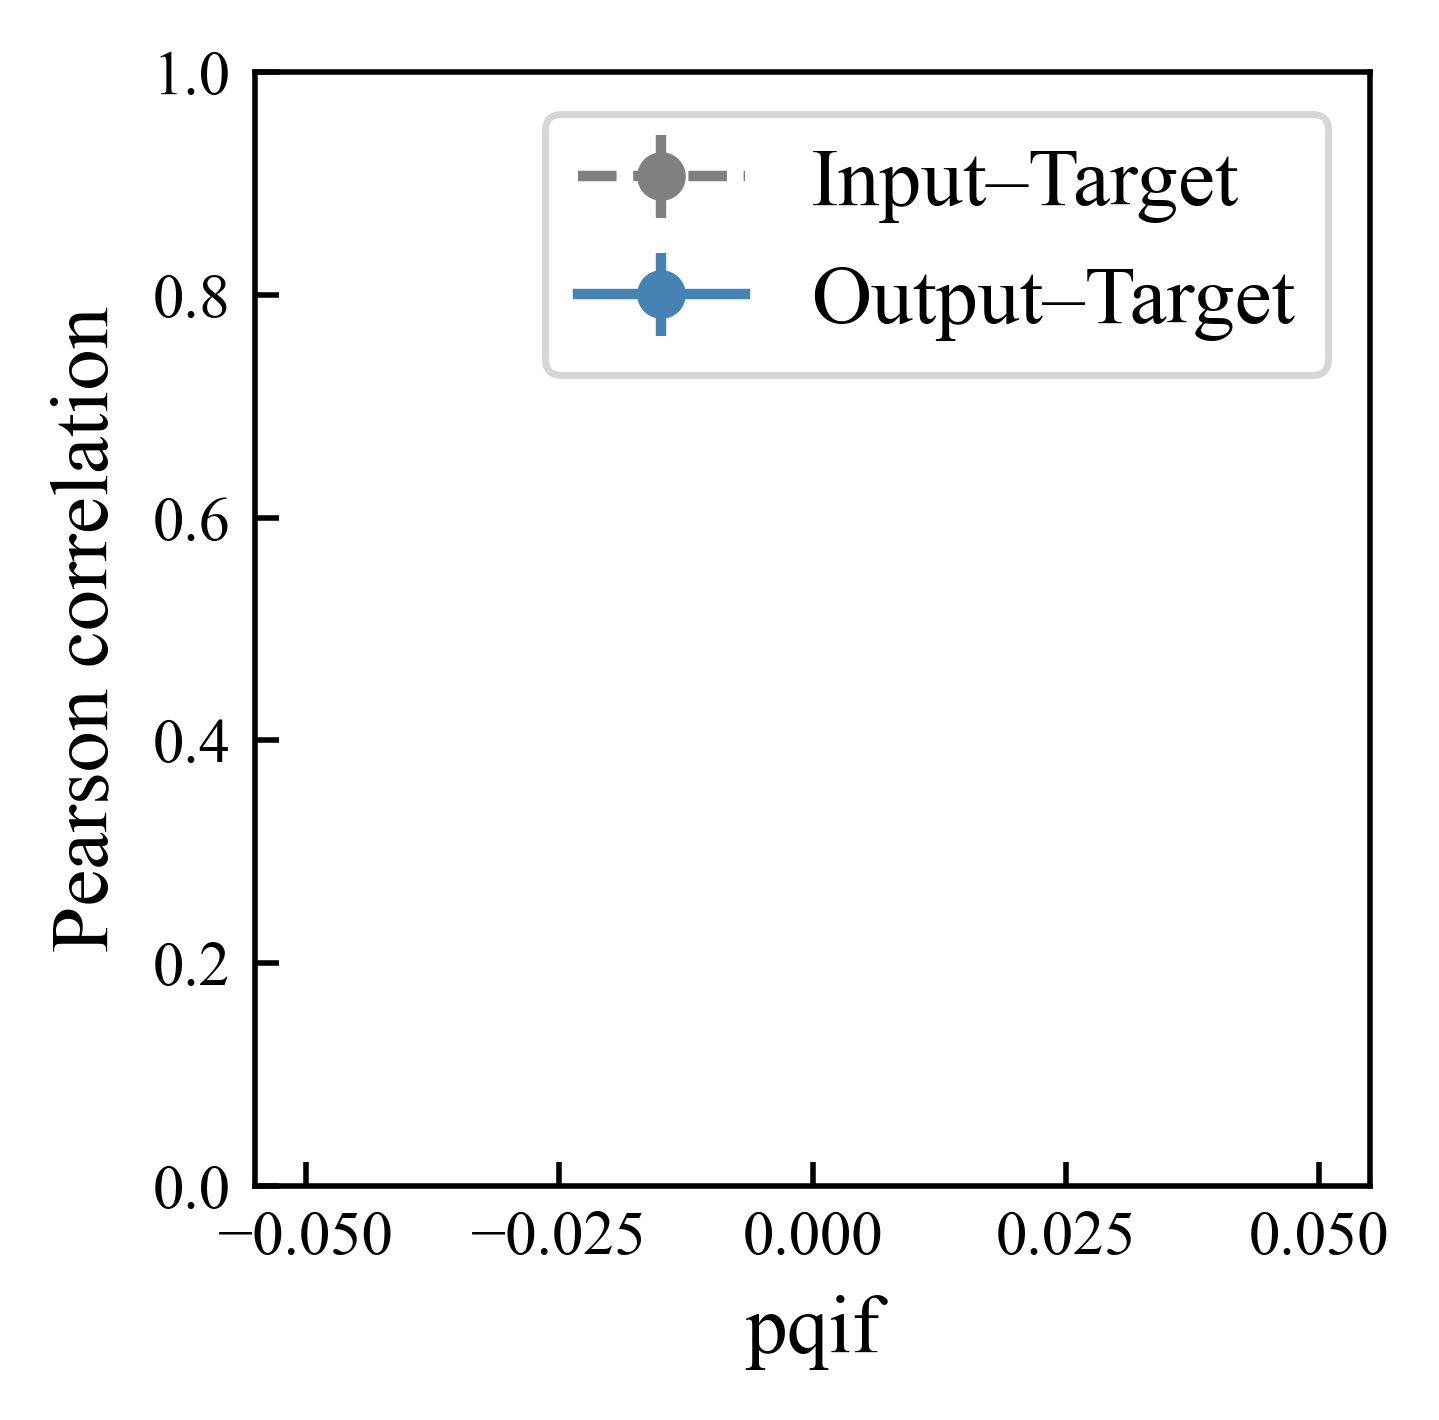

In [16]:


# ============ PARÁMETROS ============
for idx in [1,2]:
    omegagauss = 0.5

    N = 200
    points_per_window = 10
    cant_seed = 10

    pqif_vector = [0, 0.25, 0.5, 0.75]
    iloop = 11
    itstim = 200


    # ======================================================================
    # ============ DPR DEL TARGET (UNA SOLA VEZ) =============================
    # ======================================================================
    pqif_ref = pqif_vector[0]
    targets_path = f'simulation_{idx}/simulation_{idx}_targets_{pqif_ref}.csv'

    targets = pd.read_csv(targets_path).values
    targets = targets[itstim:, :]

    n_windows = targets.shape[0] // points_per_window
    targets = targets[:n_windows * points_per_window, :]
    targets = targets.reshape(n_windows, points_per_window, N)

    rprom_targets = np.mean(targets, axis=1).T
    cov_targets = np.cov(rprom_targets, rowvar=True, bias=False)

    DPR_target, *_ = dpr_bias(cov_targets, N=N, nloop=rprom_targets.shape[1])
    print(f"DPR del TARGET = {DPR_target:.4f}")


    # ======================================================================
    # ============ DPR OUTPUTS e INPUTS =====================================
    # ======================================================================
    DPR_outputs = {}
    DPR_inputs = {}

    for pqif in pqif_vector:
        dpr_out_seeds = []
        dpr_in_seeds = []
        
        for seed in range(cant_seed):
            
            out_path = (
                f'simulation_{idx}/simulation_{idx}_outputs/'
                f'simulation_{idx}_outputs_pqif_{pqif}_iloop_{iloop}_seed_{seed}.csv'
            )
            
            in_path = (
                f'simulation_{idx}/simulation_{idx}_inputs/'
                f'simulation_{idx}_inputs_pqif_{pqif}_iloop_{iloop}_seed_{seed}.csv'
            )
            
            if not os.path.exists(out_path) or not os.path.exists(in_path):
                continue
            
            # -------- OUTPUTS --------
            out = pd.read_csv(out_path, header=None).values
            n_windows = out.shape[0] // points_per_window
            out = out[:n_windows * points_per_window, :]
            out = out.reshape(n_windows, points_per_window, N)
            rprom_out = np.mean(out, axis=1).T
            
            cov_out = np.cov(rprom_out, rowvar=True, bias=False)
            dpr_out, *_ = dpr_bias(cov_out, N=N, nloop=rprom_out.shape[1])
            dpr_out_seeds.append(dpr_out)
            
            # -------- INPUTS --------
            inp = pd.read_csv(in_path, header=None).values
            n_windows = inp.shape[0] // points_per_window
            inp = inp[:n_windows * points_per_window, :]
            inp = inp.reshape(n_windows, points_per_window, N)
            rprom_in = np.mean(inp, axis=1).T
            
            cov_in = np.cov(rprom_in, rowvar=True, bias=False)
            dpr_in, *_ = dpr_bias(cov_in, N=N, nloop=rprom_in.shape[1])
            dpr_in_seeds.append(dpr_in)
        
        DPR_outputs[pqif] = dpr_out_seeds
        DPR_inputs[pqif] = dpr_in_seeds


    # Estadísticas
    pqif_used = []
    DPR_out_mean, DPR_out_std = [], []
    DPR_in_mean, DPR_in_std = [], []

    for pqif in pqif_vector:
        if len(DPR_outputs[pqif]) > 0:
            pqif_used.append(pqif)
            DPR_out_mean.append(np.mean(DPR_outputs[pqif]))
            DPR_out_std.append(np.std(DPR_outputs[pqif]))
            DPR_in_mean.append(np.mean(DPR_inputs[pqif]))
            DPR_in_std.append(np.std(DPR_inputs[pqif]))


    # ======================================================================
    # ============ PEARSON INPUT vs OUTPUT ==================================
    # ======================================================================
    Pearson_inputs = {}
    Pearson_outputs = {}

    for pqif in pqif_vector:
        pi_seeds, po_seeds = [], []
        
        targets_path = f'simulation_{idx}/simulation_{idx}_targets_{pqif}.csv'
        targets = pd.read_csv(targets_path).values
        
        for seed in range(cant_seed):
            
            in_path = (
                f'simulation_{idx}/simulation_{idx}_inputs/'
                f'simulation_{idx}_inputs_pqif_{pqif}_iloop_{iloop}_seed_{seed}.csv'
            )
            
            out_path = (
                f'simulation_{idx}/simulation_{idx}_outputs/'
                f'simulation_{idx}_outputs_pqif_{pqif}_iloop_{iloop}_seed_{seed}.csv'
            )
            
            if not os.path.exists(in_path) or not os.path.exists(out_path):
                continue
            
            inputs = pd.read_csv(in_path, header=None).values
            outputs = pd.read_csv(out_path, header=None).values
            
            ci_in = np.zeros(N)
            ci_out = np.zeros(N)
            
            for i in range(N):
                if np.var(targets[itstim:, i]) > 0:
                    if np.var(inputs[itstim:, i]) > 0:
                        ci_in[i] = pearsonr(
                            targets[itstim:, i], inputs[itstim:, i]
                        )[0]
                    if np.var(outputs[itstim:, i]) > 0:
                        ci_out[i] = pearsonr(
                            targets[itstim:, i], outputs[itstim:, i]
                        )[0]
            
            pi_seeds.append(np.mean(ci_in))
            po_seeds.append(np.mean(ci_out))
        
        Pearson_inputs[pqif] = pi_seeds
        Pearson_outputs[pqif] = po_seeds


    pqif_p = []
    Pin_m, Pin_s = [], []
    Pout_m, Pout_s = [], []

    for pqif in pqif_vector:
        if len(Pearson_inputs[pqif]) > 0:
            pqif_p.append(pqif)
            Pin_m.append(np.mean(Pearson_inputs[pqif]))
            Pin_s.append(np.std(Pearson_inputs[pqif]))
            Pout_m.append(np.mean(Pearson_outputs[pqif]))
            Pout_s.append(np.std(Pearson_outputs[pqif]))


    # ======================================================================
    # ============ GRÁFICO 1: DPR ===========================================
    # ======================================================================
    fig1, ax1 = plt.subplots(figsize=(3, 3))

    ax1.errorbar(
        pqif_used, DPR_out_mean, yerr=DPR_out_std,
        fmt='o-', color='black', capsize=2,
        label='DPR outputs'
    )

    ax1.errorbar(
        pqif_used, DPR_in_mean, yerr=DPR_in_std,
        fmt='s--', color='gray', capsize=2,
        label='DPR inputs'
    )

    ax1.axhline(
        DPR_target, color='purple',
        linestyle='--', linewidth=2,
        label='DPR target'
    )

    ax1.set_xlabel('pqif')
    ax1.set_ylabel('DPR')


    ax1.legend()


    # ======================================================================
    # ============ GRÁFICO 2: PEARSON =======================================
    # ======================================================================
    fig2, ax2 = plt.subplots(figsize=(3, 3))

    ax2.errorbar(
        pqif_p, Pin_m, yerr=Pin_s,
        fmt='o--', color='gray', capsize=5,
        label='Input–Target'
    )

    ax2.errorbar(
        pqif_p, Pout_m, yerr=Pout_s,
        fmt='o-', color='steelblue', capsize=5,
        label='Output–Target'
    )

    ax2.set_xlabel('pqif')
    ax2.set_ylabel('Pearson correlation')
    ax2.set_ylim([0, 1])

 
    ax2.legend()

    plt.tight_layout()
    plt.show()




DPR del TARGET = 4.2131


C:\Users\aceve\AppData\Local\Temp\ipykernel_22248\3254100381.py:228: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


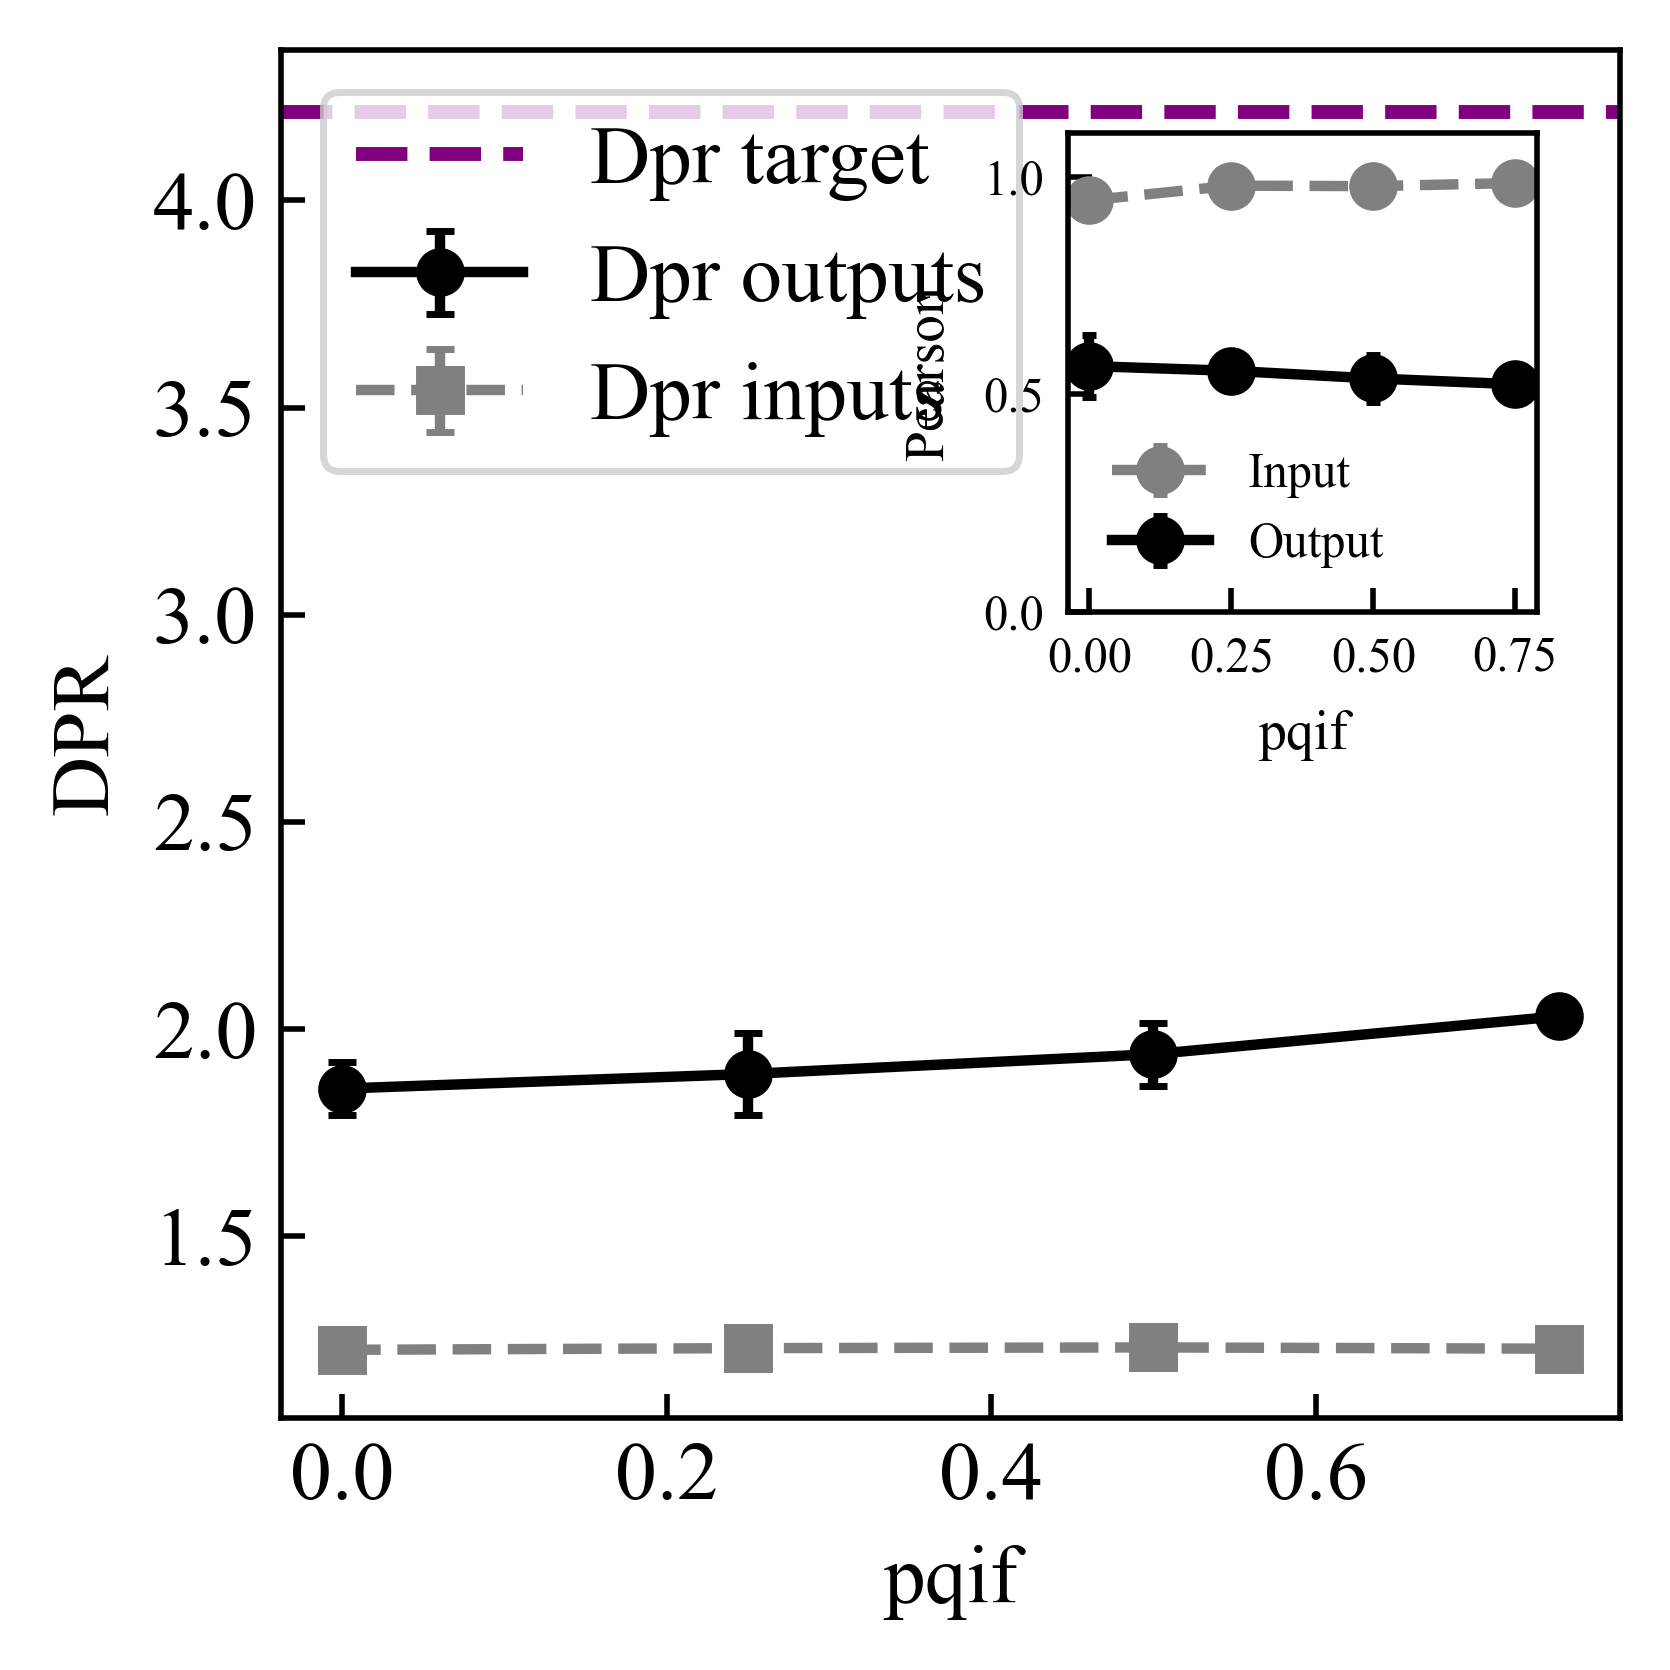

DPR del TARGET = 4.2131


C:\Users\aceve\AppData\Local\Temp\ipykernel_22248\3254100381.py:228: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


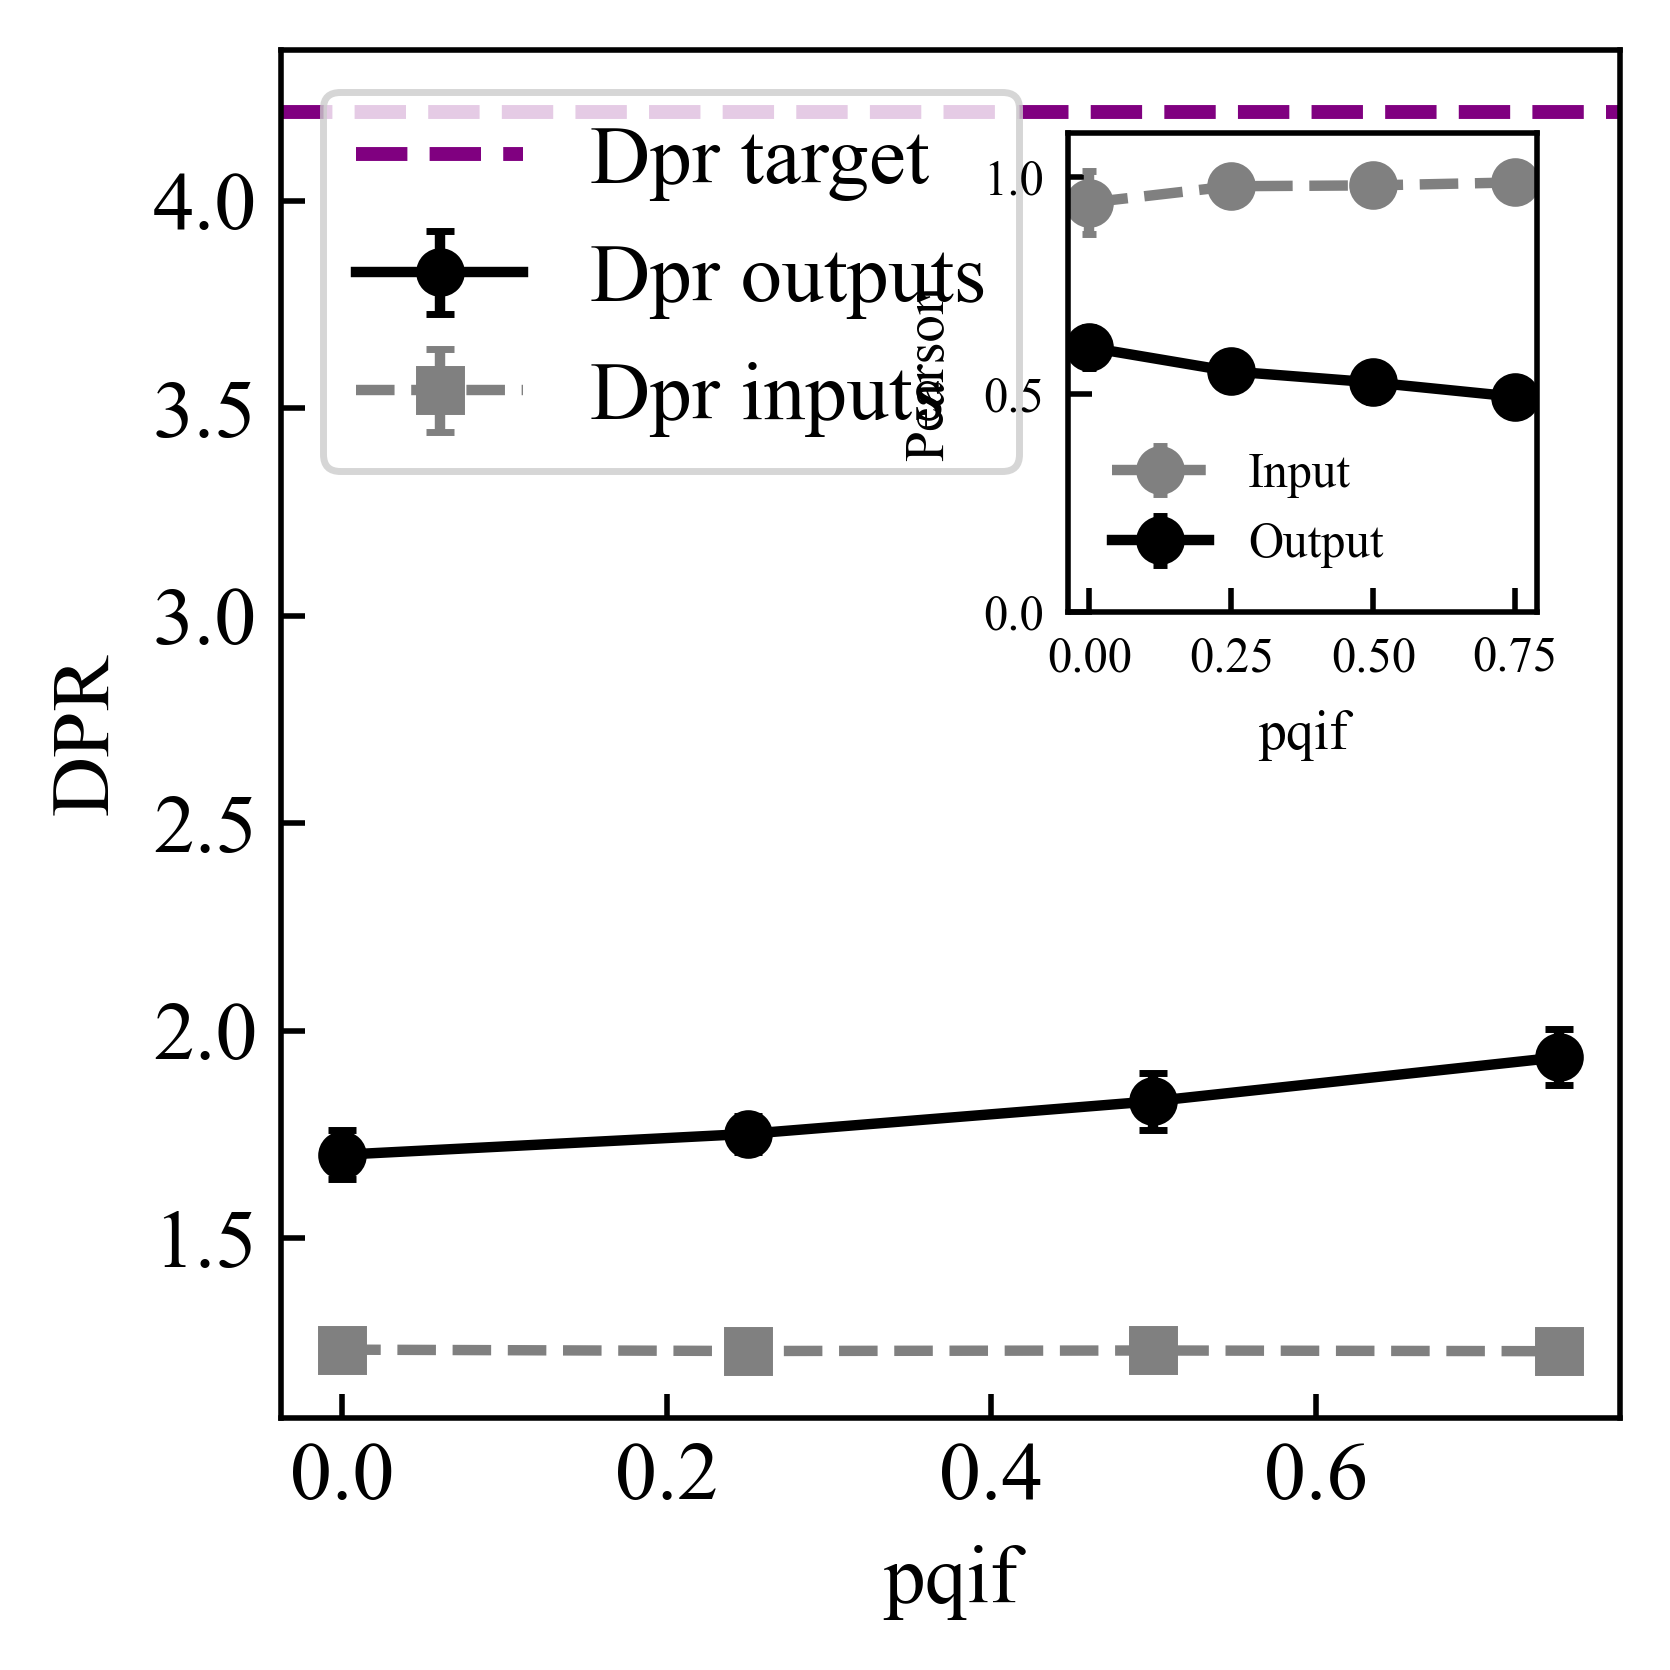

In [30]:


# ============ PARÁMETROS ============
for idx in [1,2]:
    omegagauss = 0.5

    N = 200
    points_per_window = 10
    cant_seed = 10

    pqif_vector = [0, 0.25, 0.5, 0.75]
    iloop = 11
    itstim = 200


    # ======================================================================
    # ============ DPR DEL TARGET (UNA SOLA VEZ) =============================
    # ======================================================================
    pqif_ref = pqif_vector[0]
    targets_path = f'simulation_{idx}/simulation_{idx}_targets_{pqif_ref}.csv'

    targets = pd.read_csv(targets_path).values
    targets = targets[itstim:, :]

    n_windows = targets.shape[0] // points_per_window
    targets = targets[:n_windows * points_per_window, :]
    targets = targets.reshape(n_windows, points_per_window, N)

    rprom_targets = np.mean(targets, axis=1).T
    cov_targets = np.cov(rprom_targets, rowvar=True, bias=False)

    DPR_target, *_ = dpr_bias(cov_targets, N=N, nloop=rprom_targets.shape[1])
    print(f"DPR del TARGET = {DPR_target:.4f}")


    # ======================================================================
    # ============ DPR OUTPUTS e INPUTS =====================================
    # ======================================================================
    DPR_outputs = {}
    DPR_inputs = {}

    for pqif in pqif_vector:
        dpr_out_seeds = []
        dpr_in_seeds = []
        
        for seed in range(cant_seed):
            
            out_path = (
                f'simulation_{idx}/simulation_{idx}_outputs/'
                f'simulation_{idx}_outputs_pqif_{pqif}_iloop_{iloop}_seed_{seed}.csv'
            )
            
            in_path = (
                f'simulation_{idx}/simulation_{idx}_inputs/'
                f'simulation_{idx}_inputs_pqif_{pqif}_iloop_{iloop}_seed_{seed}.csv'
            )
            
            if not os.path.exists(out_path) or not os.path.exists(in_path):
                continue
            
            # -------- OUTPUTS --------
            out = pd.read_csv(out_path, header=None).values
            n_windows = out.shape[0] // points_per_window
            out = out[:n_windows * points_per_window, :]
            out = out.reshape(n_windows, points_per_window, N)
            rprom_out = np.mean(out, axis=1).T
            
            cov_out = np.cov(rprom_out, rowvar=True, bias=False)
            dpr_out, *_ = dpr_bias(cov_out, N=N, nloop=rprom_out.shape[1])
            dpr_out_seeds.append(dpr_out)
            
            # -------- INPUTS --------
            inp = pd.read_csv(in_path, header=None).values
            n_windows = inp.shape[0] // points_per_window
            inp = inp[:n_windows * points_per_window, :]
            inp = inp.reshape(n_windows, points_per_window, N)
            rprom_in = np.mean(inp, axis=1).T
            
            cov_in = np.cov(rprom_in, rowvar=True, bias=False)
            dpr_in, *_ = dpr_bias(cov_in, N=N, nloop=rprom_in.shape[1])
            dpr_in_seeds.append(dpr_in)
        
        DPR_outputs[pqif] = dpr_out_seeds
        DPR_inputs[pqif] = dpr_in_seeds


    # Estadísticas
    pqif_used = []
    DPR_out_mean, DPR_out_std = [], []
    DPR_in_mean, DPR_in_std = [], []

    for pqif in pqif_vector:
        if len(DPR_outputs[pqif]) > 0:
            pqif_used.append(pqif)
            DPR_out_mean.append(np.mean(DPR_outputs[pqif]))
            DPR_out_std.append(np.std(DPR_outputs[pqif]))
            DPR_in_mean.append(np.mean(DPR_inputs[pqif]))
            DPR_in_std.append(np.std(DPR_inputs[pqif]))


    # ======================================================================
    # ============ PEARSON INPUT vs OUTPUT ==================================
    # ======================================================================
    Pearson_inputs = {}
    Pearson_outputs = {}

    for pqif in pqif_vector:
        pi_seeds, po_seeds = [], []
        
        targets_path = f'simulation_{idx}/simulation_{idx}_targets_{pqif}.csv'
        targets = pd.read_csv(targets_path).values
        
        for seed in range(cant_seed):
            
            in_path = (
                f'simulation_{idx}/simulation_{idx}_inputs/'
                f'simulation_{idx}_inputs_pqif_{pqif}_iloop_{iloop}_seed_{seed}.csv'
            )
            
            out_path = (
                f'simulation_{idx}/simulation_{idx}_outputs/'
                f'simulation_{idx}_outputs_pqif_{pqif}_iloop_{iloop}_seed_{seed}.csv'
            )
            
            if not os.path.exists(in_path) or not os.path.exists(out_path):
                continue
            
            inputs = pd.read_csv(in_path, header=None).values
            outputs = pd.read_csv(out_path, header=None).values
            
            ci_in = np.zeros(N)
            ci_out = np.zeros(N)
            
            for i in range(N):
                if np.var(targets[itstim:, i]) > 0:
                    if np.var(inputs[itstim:, i]) > 0:
                        ci_in[i] = pearsonr(
                            targets[itstim:, i], inputs[itstim:, i]
                        )[0]
                    if np.var(outputs[itstim:, i]) > 0:
                        ci_out[i] = pearsonr(
                            targets[itstim:, i], outputs[itstim:, i]
                        )[0]
            
            pi_seeds.append(np.mean(ci_in))
            po_seeds.append(np.mean(ci_out))
        
        Pearson_inputs[pqif] = pi_seeds
        Pearson_outputs[pqif] = po_seeds


    pqif_p = []
    Pin_m, Pin_s = [], []
    Pout_m, Pout_s = [], []

    for pqif in pqif_vector:
        if len(Pearson_inputs[pqif]) > 0:
            pqif_p.append(pqif)
            Pin_m.append(np.mean(Pearson_inputs[pqif]))
            Pin_s.append(np.std(Pearson_inputs[pqif]))
            Pout_m.append(np.mean(Pearson_outputs[pqif]))
            Pout_s.append(np.std(Pearson_outputs[pqif]))


    # ======================================================================
    # ============ GRÁFICO: DPR + INSET PEARSON =============================
    # ======================================================================
    fig, ax = plt.subplots(figsize=(3.5, 3.5))

    # ---------- DPR OUTPUTS ----------
    ax.errorbar(
        pqif_used, DPR_out_mean, yerr=DPR_out_std,
        fmt='o-', color='black', capsize=2,
        label='Dpr outputs'
    )

    # ---------- DPR INPUTS ----------
    ax.errorbar(
        pqif_used, DPR_in_mean, yerr=DPR_in_std,
        fmt='s--', color='gray', capsize=2,
        label='Dpr inputs'
    )

    # ---------- DPR TARGET ----------
    ax.axhline(
        DPR_target, color='purple',
        linestyle='--', linewidth=2,
        label='Dpr target'
    )

    ax.set_xlabel('pqif')
    ax.set_ylabel('DPR')
    ax.legend(loc = 'upper left')
    ax.tick_params(labelsize=12)


    # ======================================================================
    # ============ INSET: PEARSON ===========================================
    # ======================================================================
    ax_inset = inset_axes(
        ax,
        width="35%",     # ancho relativo
        height="35%",    # alto relativo
        loc='upper right',
        borderpad=1
    )

    # Pearson INPUT–TARGET
    ax_inset.errorbar(
        pqif_p, Pin_m, yerr=Pin_s,
        fmt='o--', color='gray', capsize=1,
        label='Input'
    )

    # Pearson OUTPUT–TARGET
    ax_inset.errorbar(
        pqif_p, Pout_m, yerr=Pout_s,
        fmt='o-', color='black', capsize=1,
        label='Output'
    )

    ax_inset.set_ylim([0, 1.1])
    ax_inset.set_xticks(pqif_p)
    ax_inset.tick_params(labelsize=7)

    ax_inset.set_xlabel('pqif', fontsize=8)
    ax_inset.set_ylabel('Pearson', fontsize=8)
    ax_inset.legend(fontsize=7, frameon=False)

    plt.tight_layout()
    plt.savefig(f'sequences_DPR_Pearson_inset_idx{idx}_omega{omegagauss}.svg', dpi=300)
    plt.show()


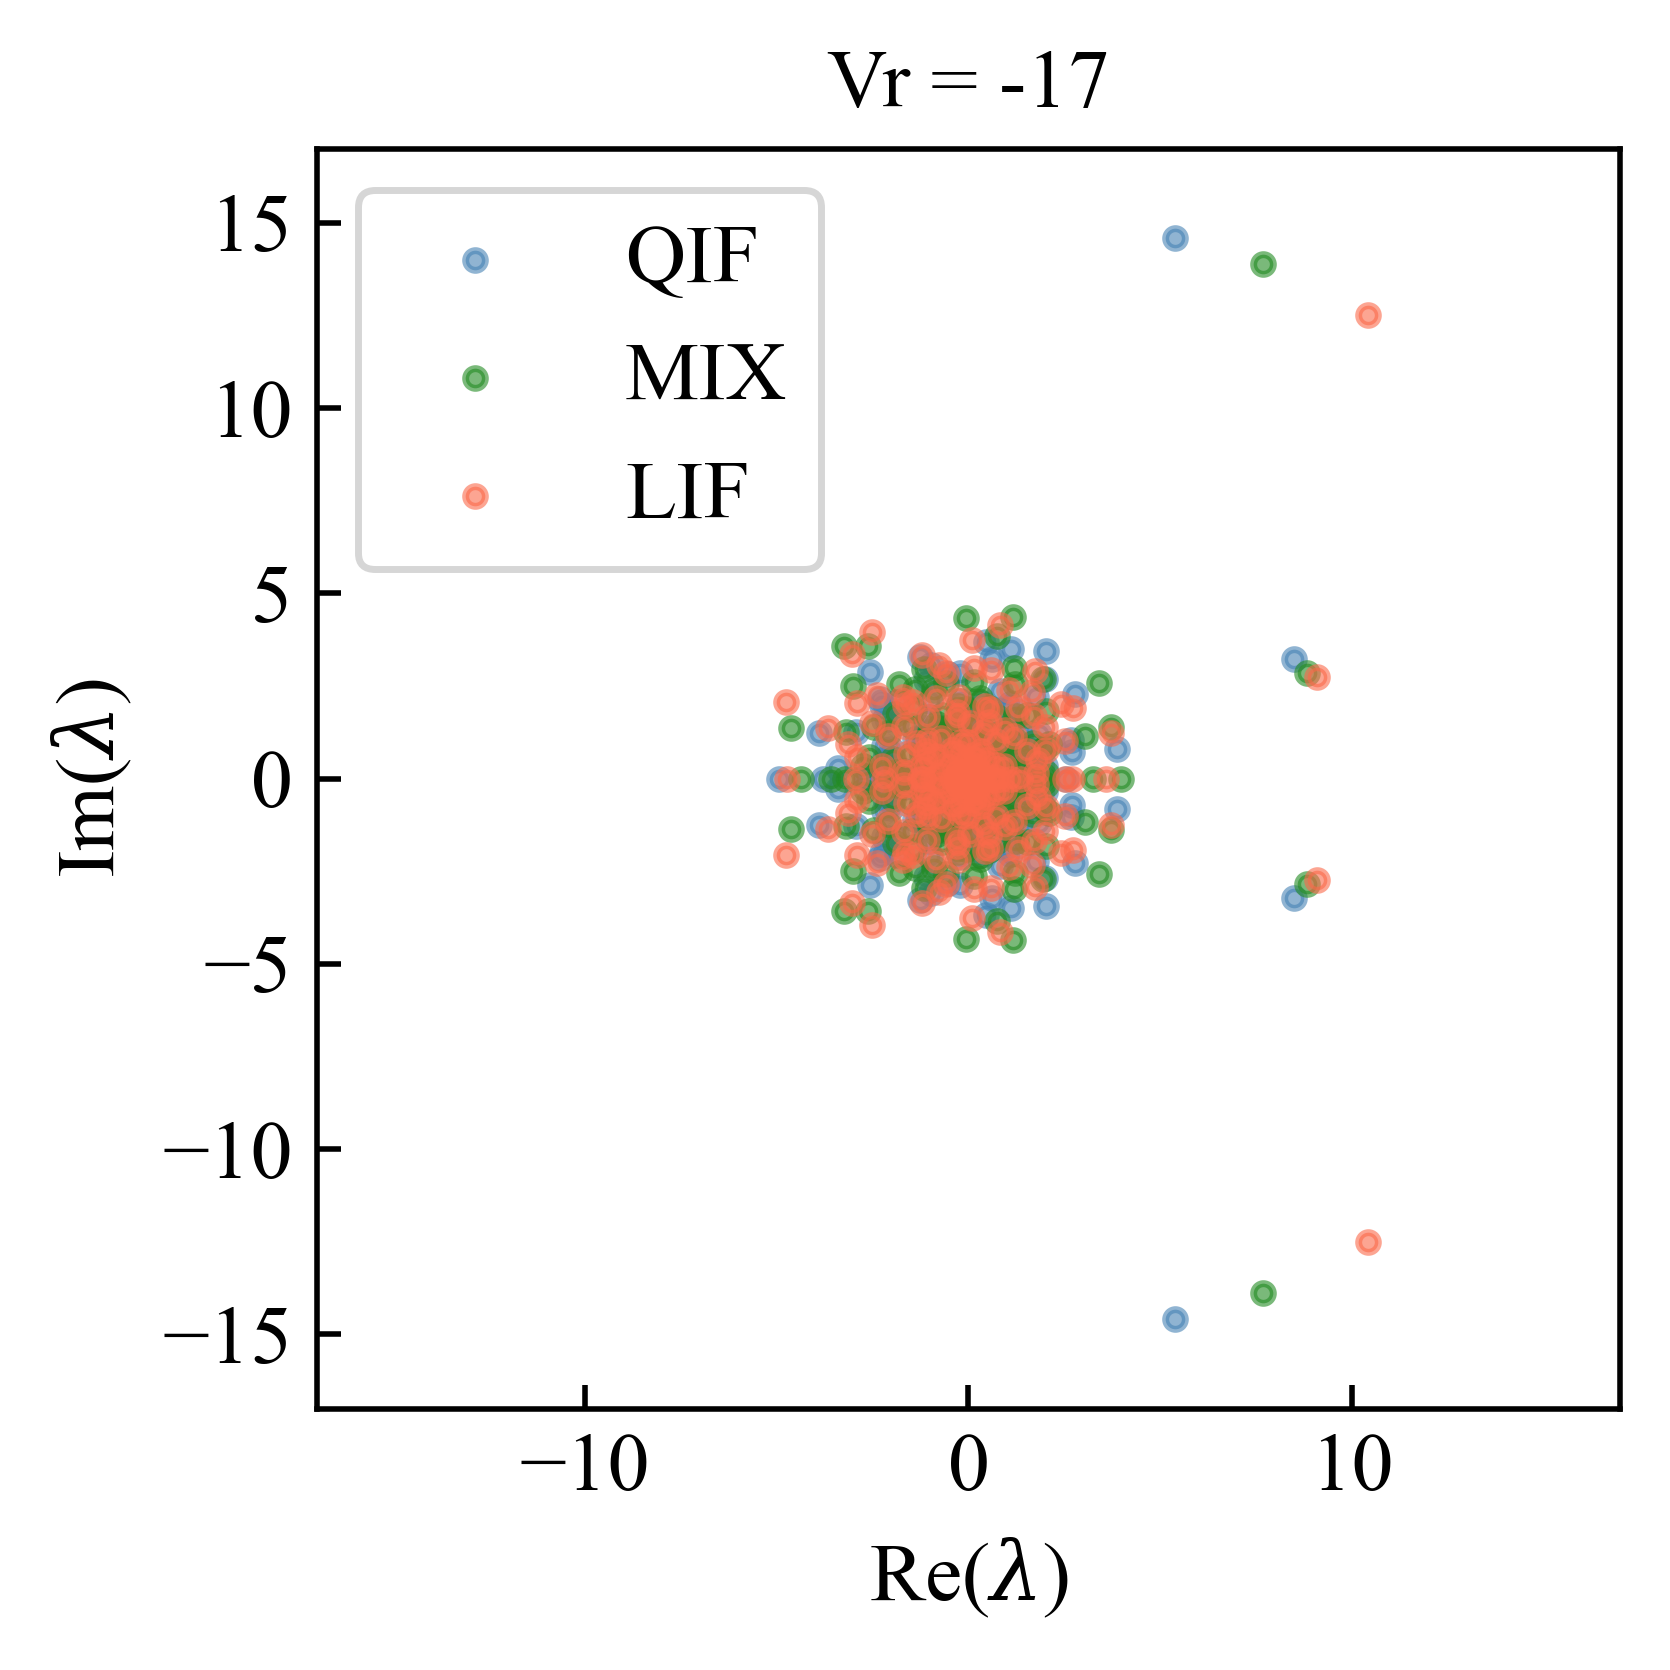

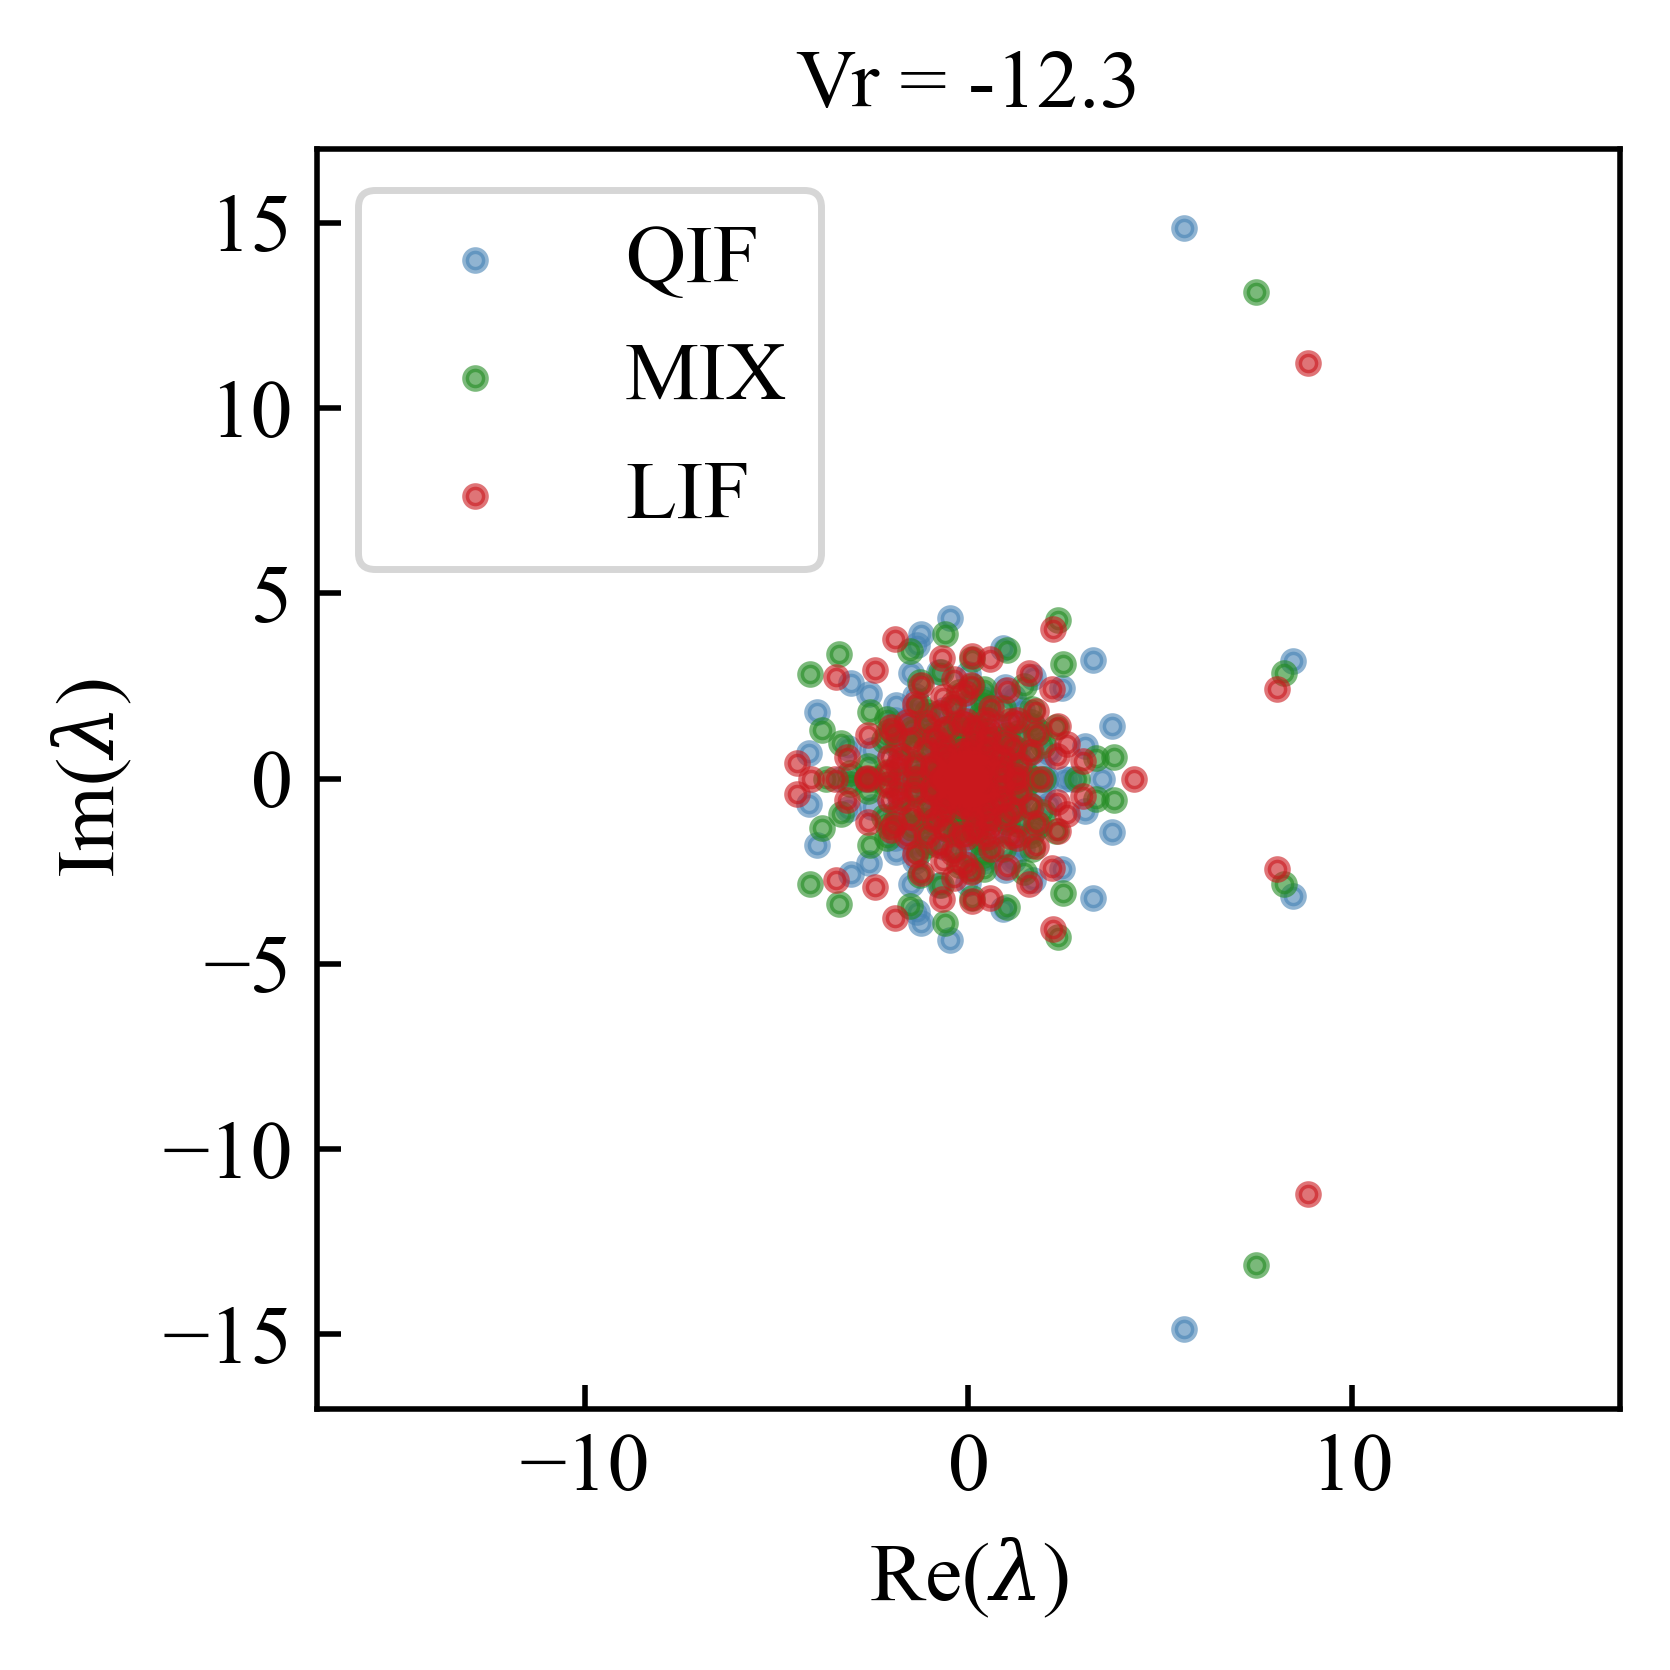

In [31]:
def csv_to_matrix(filename):
    df = pd.read_csv(filename, header=None) 
    matrix = df.values 
    return matrix

pqif_vector = [1, 0.5, 0]
etiquetas = ['QIF', 'MIX', 'LIF']


iloop = 11
omegagauss = 0.5
for idx in [1, 2]:
    plt.figure(figsize=(3.5, 3.5))
    parametros_path = f'simulation_{idx}/simulation_{idx}_parameters.csv'
    df_parametros = pd.read_csv(parametros_path)
    v_rest = df_parametros['vrest'].values[0]


    for k, pqif in enumerate(pqif_vector):
        if pqif == 0:
            color = color_map[v_rest]
        elif pqif == 0.5:
            color = 'forestgreen'
        else:
            color = 'steelblue'

        filename = f'simulation_{idx}/simulation_{idx}_connectivity_matrix/simulation_{idx}_connectivity_pqif_{pqif}_iloop_{iloop}_seed_2'
        matrix = csv_to_matrix(filename)
        eigenval, _ = np.linalg.eig(matrix)
        ar = np.real(eigenval)
        ai = np.imag(eigenval)

        plt.scatter(ar, ai, color=color, alpha=0.6, label=etiquetas[k], s=8)

    plt.xlabel('Re($\\lambda$)')
    plt.ylabel('Im($\\lambda$)')
    plt.title('Vr = ' + str(v_rest) )
    plt.tick_params(labelsize=12)
    plt.xlim(-17, 17)
    plt.ylim(-17, 17)
    plt.legend()

    plt.tight_layout()
    plt.savefig(f'oscillations_espectro_vr_{v_rest}.svg')
    plt.show()
